# **Import and install packages**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
!pip install associations dython missingno pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=504b57390241416bcd49a28619aad3ab4ab2be93d28ee8fc6cfa8fb9f7ad6dd4
  Stored in directory: /root/.cache/pip/wheels/9f/99/15/e881f46a92690ae77c2e3b255b89ea45d3a867b1b6c2ab3ba9
Successfully built pyclustering


In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import seaborn as sns
sns.set_palette('YlGn')
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis, pearsonr
from scipy.stats import spearmanr, kendalltau, pointbiserialr
import associations as am
from dython.nominal import associations
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
%matplotlib inline
# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve
from sklearn.metrics.cluster import contingency_matrix
from sklearn.ensemble import RandomForestClassifier
# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, classification_report
from scipy.spatial.distance import cdist
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import roc_auc_score, f1_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
from sklearn.metrics import log_loss
from collections import Counter



# **Data loading**

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

# **Data overview:**

**(Index, Shape, Datatype, Checking missing values, Column names, Unique values)**

In [ ]:
def data_overview(df, separator="*", detailed=True):
  """Prints detailed information about a Pandas DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame to analyze.
      separator (str, optional): A separator string to visually distinguish sections. Defaults to "*".
      detailed (bool, optional): Whether to include detailed information on unique values. Defaults to True.

  Returns:
      None
  """

  print(f"{separator * 80}")
  print("Data Overview:")
  print(f" Head:\n{df.head(3)}")
  print(f"{separator * 80}")
  print(f" Shape: {df.shape}")
  print(f"{separator * 80}")
  print(f" Data Types:\n{df.dtypes}")  # Newline for better readability

  if detailed:  # Optional detailed information section
    print(f"{separator * 80}")
    print("Detailed Information:")
    print(f" Missing Values:\n{df.isna().sum()}")
    print(f"{separator * 80}")
    print(f" All Columns:\n{df.columns.tolist()}")
    print(f"{separator * 80}")
    print(f"  Unique Values:")

    # Improved handling of potential type errors during detailed unique value printing
    try:
      for col, n_unique in df.nunique().items():
        print(f"    - Column: {col}, Unique Values: {n_unique}")
    except TypeError as e:
      print(f"    - Warning: Some columns may not support unique value counting ({e})")

  print(f"{separator * 80}")


data_overview(df)

********************************************************************************
Data Overview:
 Head:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
********************************************************************************
 Shape: (10000, 14)
********************************************************************************
 Data Types:
RowNumber            int

# **Here's a breakdown of the columns and their potential meanings:**

**RowNumber:** A unique identifier for each row in the dataset.

**CustomerId:** A unique identifier for each customer.

**Surname:** The last name of the customer.

**CreditScore:** A numerical score assessing the creditworthiness of the customer.

**Geography:** The geographic region where the customer resides (e.g., France, Germany, Spain).

**Gender:** The gender of the customer (Male or Female).

**Age:** The age of the customer.

**Tenure:** The number of years the customer has been a client of the bank.

**Balance:** The current balance in the customer's account.

**NumOfProducts:** The number of products (e.g., savings accounts, credit cards) the customer has with the bank.

**HasCrCard:** A binary flag indicating whether the customer has a credit card.

**IsActiveMember:** A binary flag indicating whether the customer is an active member of the bank.

**EstimatedSalary:** The estimated salary of the customer.

**Exited:** A binary target variable indicating whether the customer has exited the bank.

# **Checking Duplicates**

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

# Check for duplicate columns
duplicate_columns = df.columns[df.columns.duplicated()]
print(duplicate_columns)






Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
Index([], dtype='object')


# **Visualize missing values**

<Axes: >

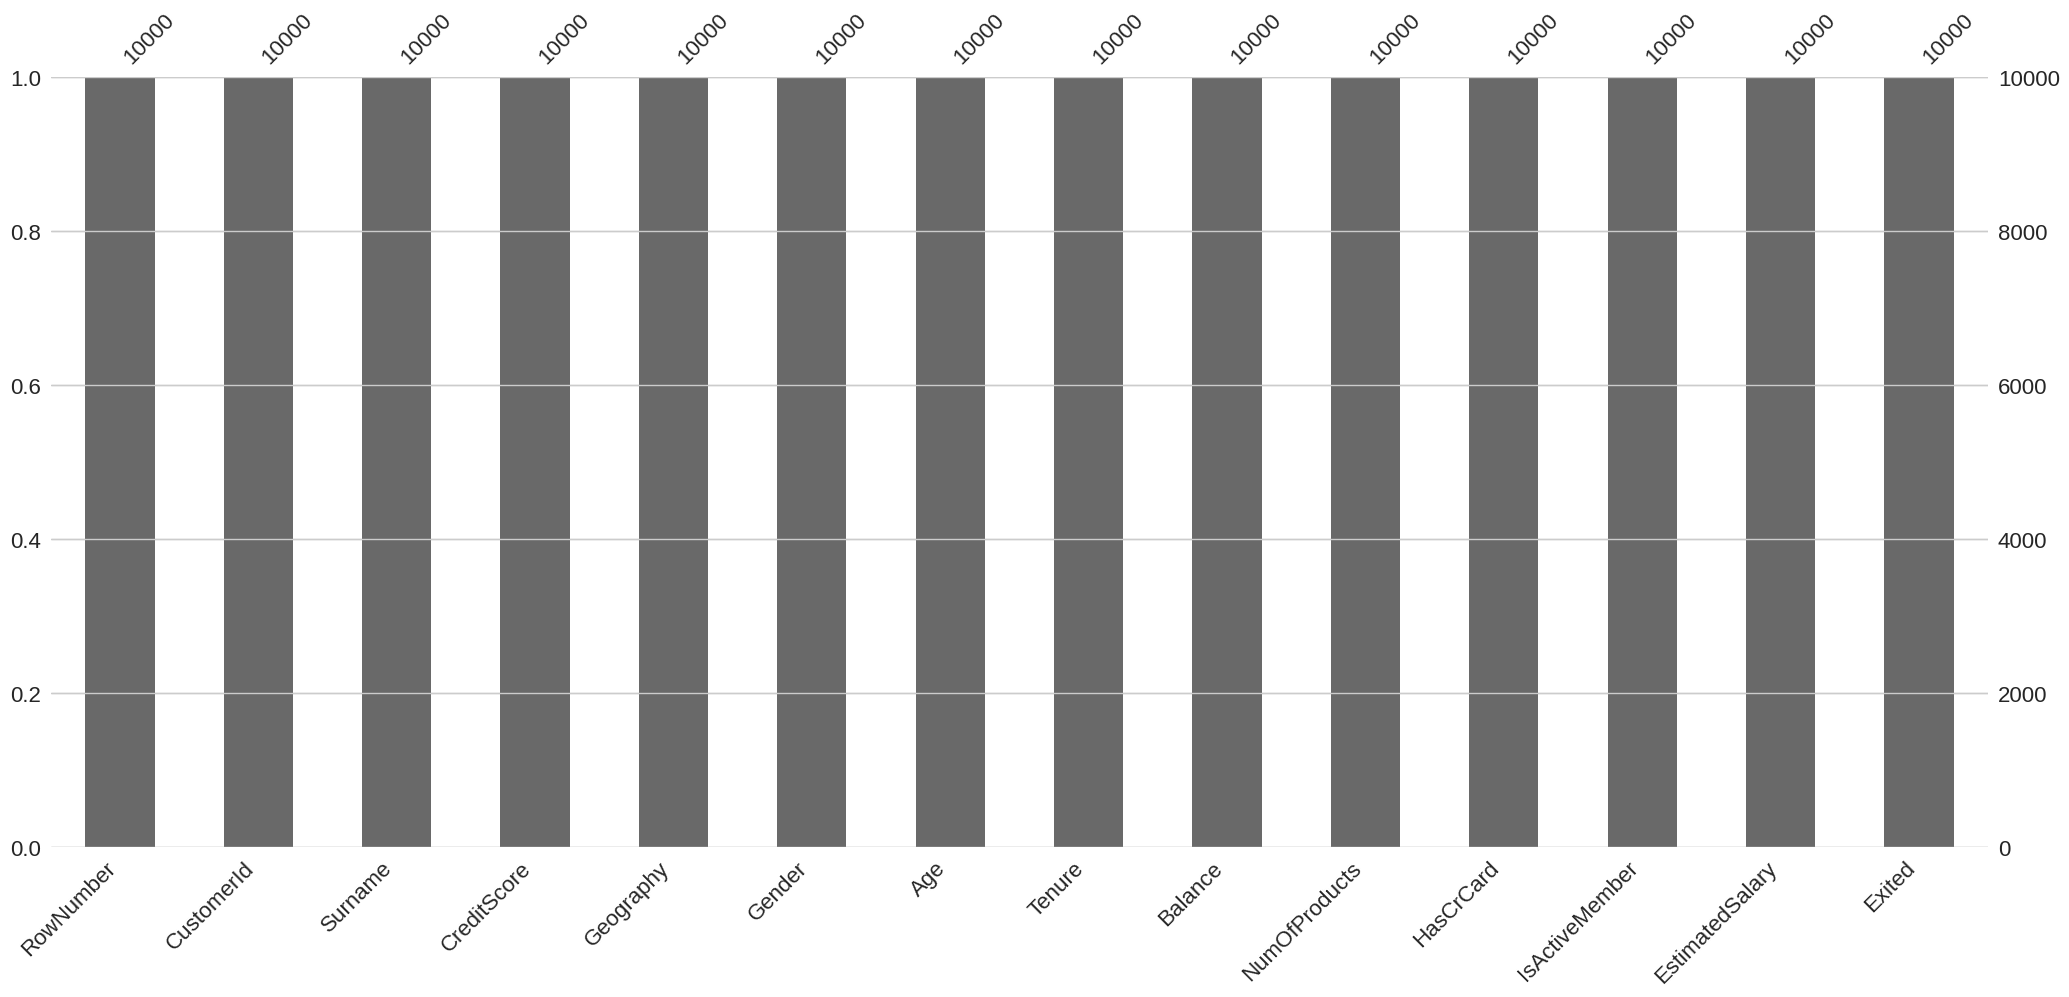

In [ ]:
# Visualize missing values as a matrix
# msno.matrix(df)

# Visualize the number of missing
# values as a bar chart
msno.bar(df)


# msno.dendrogram(df):
# Creates a dendrogram to visualize the correlation between missing values in different columns.
# Variables with similar missing value patterns are clustered together. Helps identify potential relationships
# or patterns in missing data.

# **Checking the Numerical and Categorical Features**

In [ ]:
#Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"The dataset contains {len(numerical_cols)} numerical features and {len(categorical_cols)} categorical features.")

print("Numerical features:", numerical_cols)
print("Categorical features:", categorical_cols)

# df [categorical_cols].head(3)

The dataset contains 11 numerical features and 3 categorical features.
Numerical features: Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Categorical features: Index(['Surname', 'Geography', 'Gender'], dtype='object')


# **Transforming numerical columns into categorical features**

In [ ]:
# Converts all object columns with fewer than or equal to 4 unique values to categorical data type
# def convert_to_categorical(df):
#     for col in df.columns:
#         if df[col].dtype == 'object' or df[col].nunique() <= 4:
#             df[col] = pd.Categorical(df[col])
#     return df

# df = convert_to_categorical(df)
# df.dtypes

In [ ]:

numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Convert numeric columns to float
df[numerical_features] = df[numerical_features].astype(float)

# Convert other columns to category
categorical_features = [col for col in df.columns if col not in numerical_features]
df[categorical_features] = df[categorical_features].astype('category')
df.dtypes

RowNumber          category
CustomerId         category
Surname            category
CreditScore         float64
Geography          category
Gender             category
Age                 float64
Tenure             category
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

# **Numerical Data Summary and Distribution Analysis**

In [ ]:
# numerical_columns = df.select_dtypes(exclude=['category']).columns.tolist()
# Get basic statistics using describe()
num_desc = df[numerical_features].describe().T

# Add range and variance to the describe DataFrame
num_desc['range'] = num_desc['max'] - num_desc['min']
num_desc['variance'] = df[numerical_features].var()
num_desc['skewness'] = df[numerical_features].skew()
num_desc['kurtosis'] = df[numerical_features].kurtosis()
num_desc['std_dev'] = df[numerical_features].std()

# Print the result
num_desc.round(3)

count        mean        std     min       25%         50%  \
CreditScore      10000.0     650.529     96.653  350.00    584.00     652.000   
Age              10000.0      38.922     10.488   18.00     32.00      37.000   
Balance          10000.0   76485.889  62397.405    0.00      0.00   97198.540   
EstimatedSalary  10000.0  100090.240  57510.493   11.58  51002.11  100193.915   

                        75%        max      range      variance  skewness  \
CreditScore         718.000     850.00     500.00  9.341860e+03    -0.072   
Age                  44.000      92.00      74.00  1.099940e+02     1.011   
Balance          127644.240  250898.09  250898.09  3.893436e+09    -0.141   
EstimatedSalary  149388.248  199992.48  199980.90  3.307457e+09     0.002   

                 kurtosis    std_dev  
CreditScore        -0.426     96.653  
Age                 1.395     10.488  
Balance            -1.489  62397.405  
EstimatedSalary    -1.182  57510.493

In [ ]:
df.head(3)

RowNumber CustomerId   Surname  CreditScore Geography  Gender   Age Tenure  \
0         1   15634602  Hargrave        619.0    France  Female  42.0      2   
1         2   15647311      Hill        608.0     Spain  Female  41.0      1   
2         3   15619304      Onio        502.0    France  Female  42.0      8   

     Balance NumOfProducts HasCrCard IsActiveMember  EstimatedSalary Exited  
0       0.00             1         1              1        101348.88      1  
1   83807.86             1         0              1        112542.58      0  
2  159660.80             3         1              0        113931.57      1

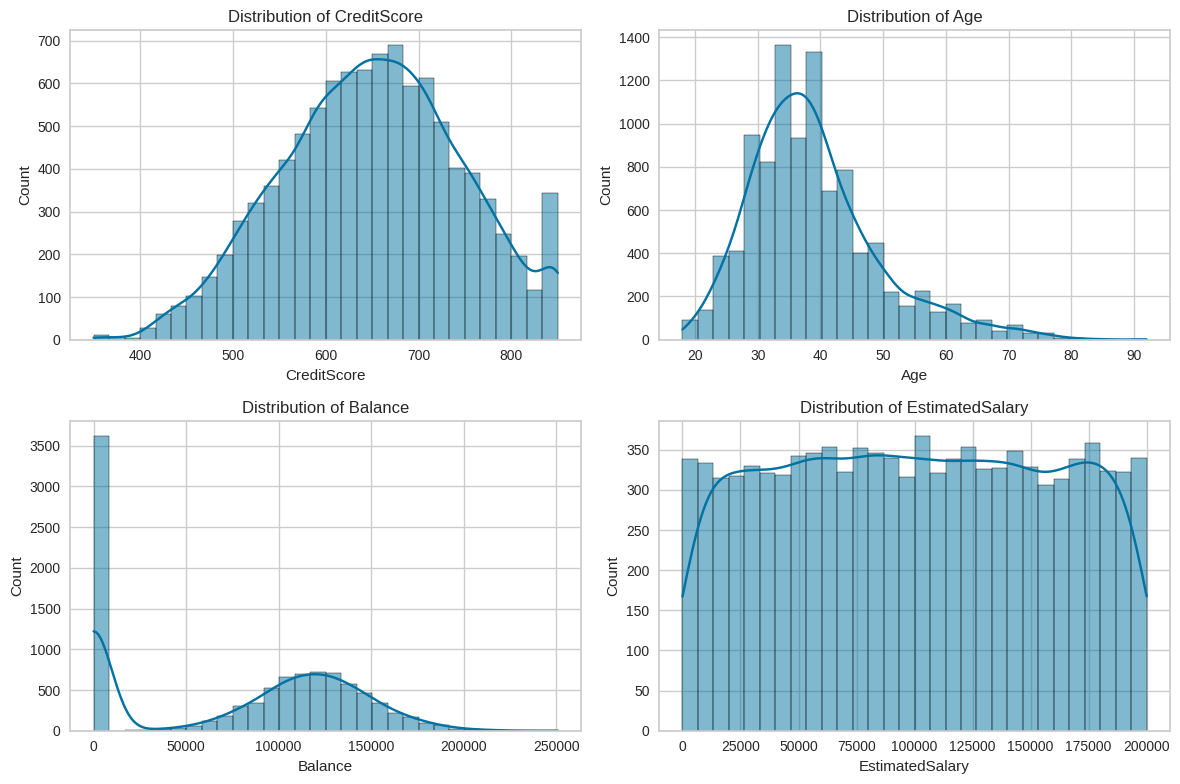

In [ ]:
# Create histograms for numerical features
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

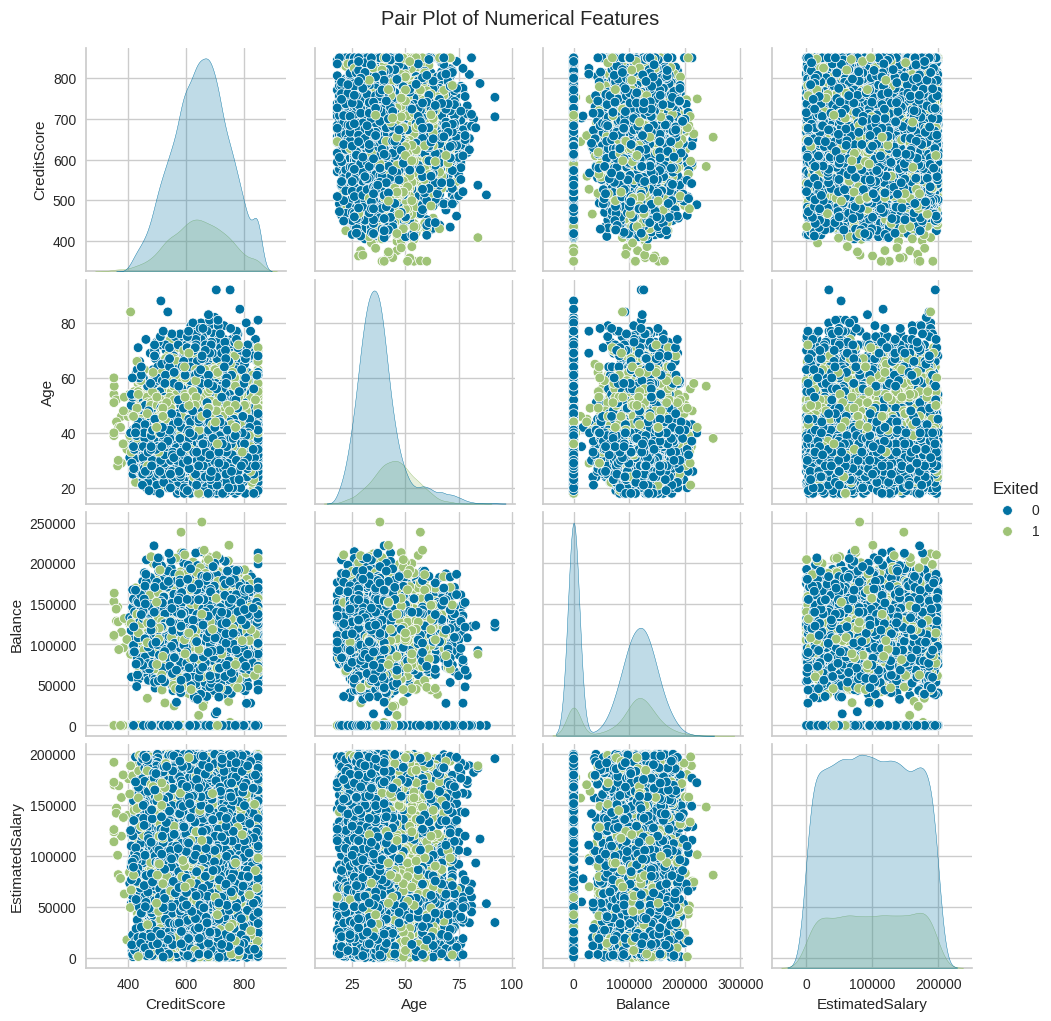

done


In [ ]:
# Create pair plot for numerical features
sns.pairplot(df, hue='Exited', vars=numerical_features)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

print('done')

In [ ]:
def plot_correlation_heatmaps(data):
    # Define correlation methods
    correlation_methods = ['pearson', 'spearman', 'kendall']

    # Plotting Heatmaps
    plt.figure(figsize=(15, len(correlation_methods) * 5))

    for i, method in enumerate(correlation_methods, 1):
        # Calculate correlation
        corr_matrix = data.corr(method=method)

        # Plot the heatmap
        plt.subplot(len(correlation_methods), 1, i)
        sns.heatmap(corr_matrix, annot=True, cmap= 'GnBu', fmt=".2f")
        plt.title(f'{method.capitalize()} Correlation')

    plt.tight_layout()
    plt.show()

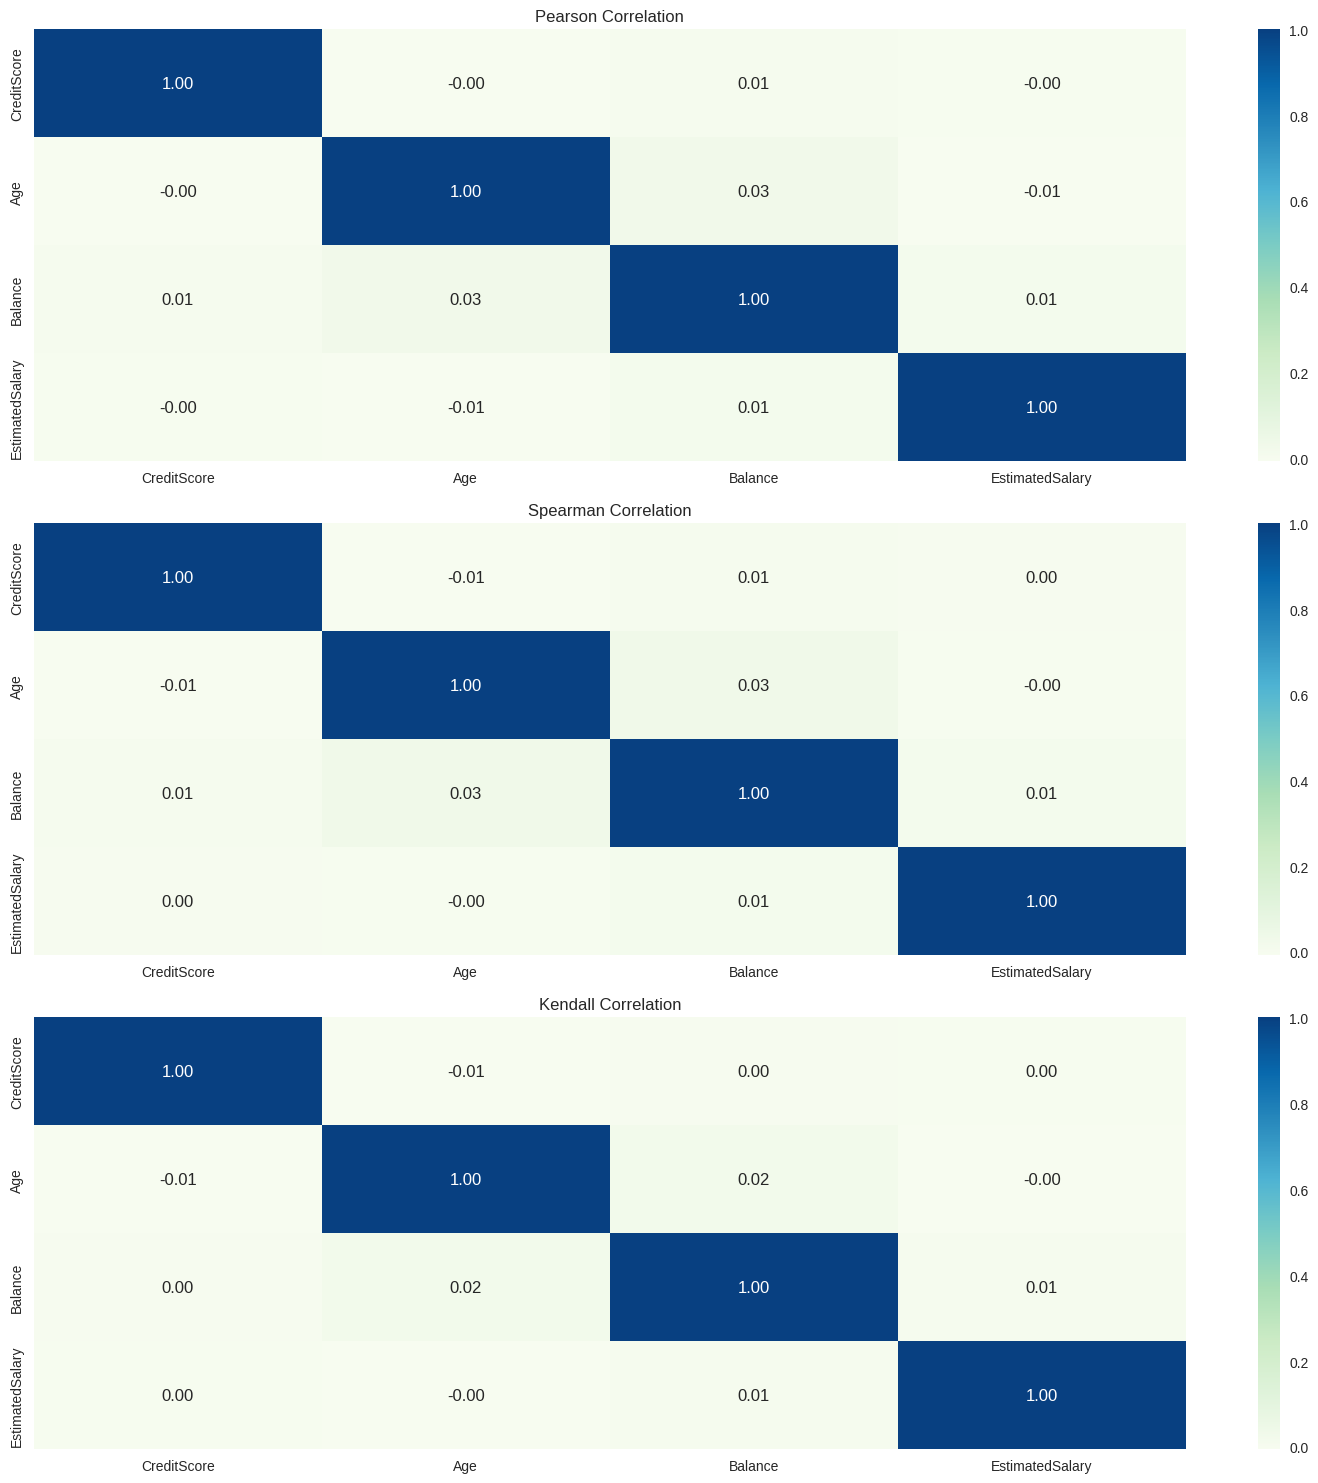

In [ ]:
plot_correlation_heatmaps(df.select_dtypes(exclude=['category']))

# **Categorical Data Summary**

In [ ]:
# Get basic statistics for categorical columns
cat_desc = df.select_dtypes(include=['category']).describe().T
# Calculate mode for each categorical column and add it to the summary
cat_desc['mode'] = df.select_dtypes(include=['category']).mode().iloc[0]
# Show updated statistics with mode
cat_desc

count unique       top  freq      mode
RowNumber       10000  10000         1     1         1
CustomerId      10000  10000  15565701     1  15565701
Surname         10000   2932     Smith    32     Smith
Geography       10000      3    France  5014    France
Gender          10000      2      Male  5457      Male
Tenure          10000     11         2  1048         2
NumOfProducts   10000      4         1  5084         1
HasCrCard       10000      2         1  7055         1
IsActiveMember  10000      2         1  5151         1
Exited          10000      2         0  7963         0

/usr/local/lib/python3.11/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  war

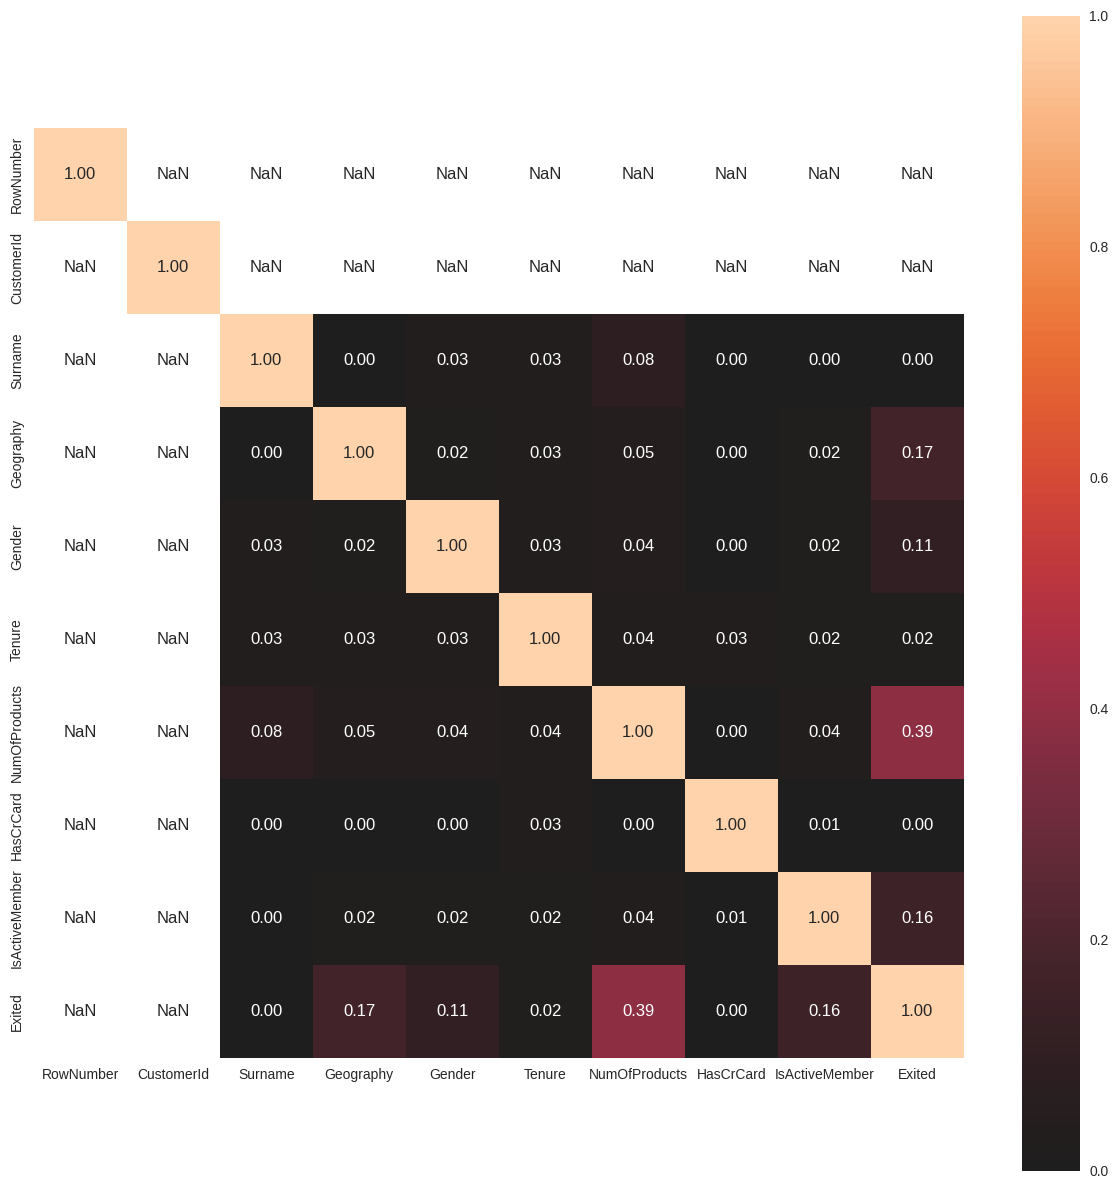

                RowNumber  CustomerId   Surname  Geography    Gender  \
RowNumber             1.0         0.0  0.000000   0.000000  0.000000   
CustomerId            0.0         1.0  0.000000   0.000000  0.000000   
Surname               0.0         0.0  1.000000   0.000000  0.026769   
Geography             0.0         0.0  0.000000   1.000000  0.022178   
Gender                0.0         0.0  0.026769   0.022178  1.000000   
Tenure                0.0         0.0  0.025399   0.026653  0.025531   
NumOfProducts         0.0         0.0  0.081665   0.046503  0.041819   
HasCrCard             0.0         0.0  0.000000   0.004849  0.000000   
IsActiveMember        0.0         0.0  0.000000   0.018179  0.019981   
Exited                0.0         0.0  0.000000   0.172999  0.105797   

                  Tenure  NumOfProducts  HasCrCard  IsActiveMember    Exited  
RowNumber       0.000000       0.000000   0.000000        0.000000  0.000000  
CustomerId      0.000000       0.000000   0.00000

In [ ]:
cramers_v = associations(df.select_dtypes(include=['category']),
             nom_nom_assoc = 'cramer',
            )
print(cramers_v['corr'])

# **Pie Chart of Customer Churn Rates**

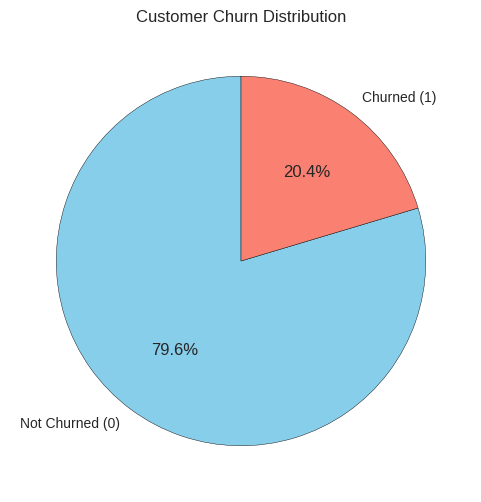

In [ ]:
# Calculate the number of remaining and lapsed customers
churn_counts = df['Exited'].value_counts()

# Draw a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Not Churned (0)', 'Churned (1)'],
        autopct='%1.1f%%', colors=['skyblue', 'salmon'],
        startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Customer Churn Distribution')
plt.show()


# **Analysis of Factors Influencing Customer Churn**

**Customer Identity Information**

In [ ]:
#  churn_counts = df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)

<ipython-input-15-cb4ded64be0f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)


<ipython-input-26-e58938257917>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby([category_column, 'Exited']).size().unstack(fill_value=0)


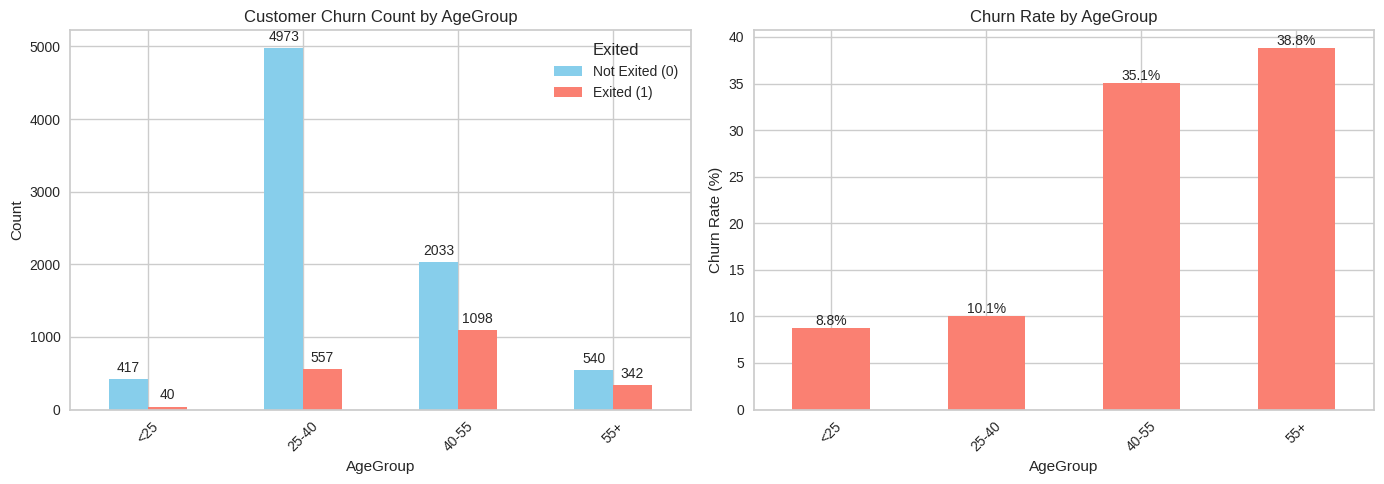

<ipython-input-26-e58938257917>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby([category_column, 'Exited']).size().unstack(fill_value=0)


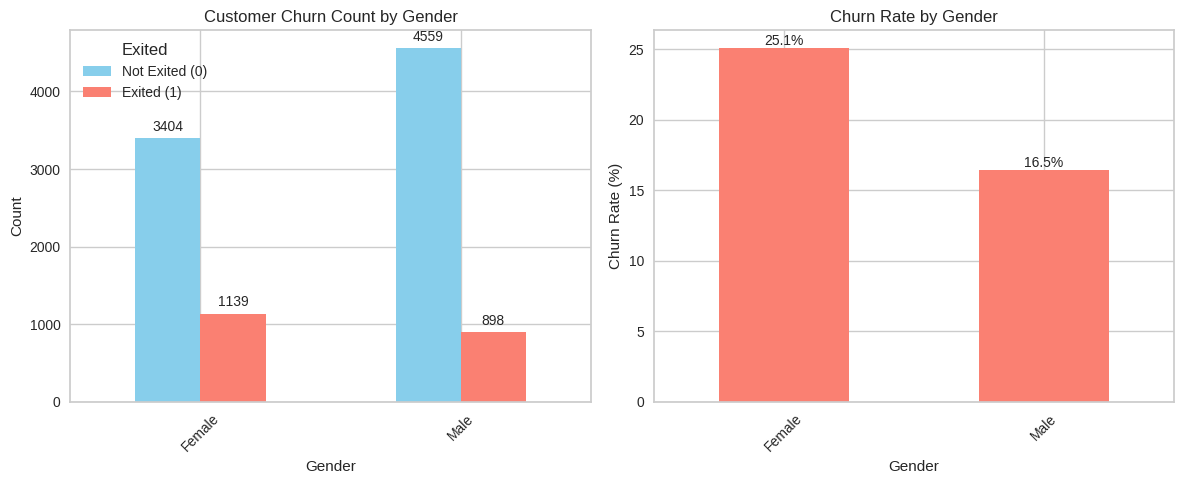

<ipython-input-26-e58938257917>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby([category_column, 'Exited']).size().unstack(fill_value=0)


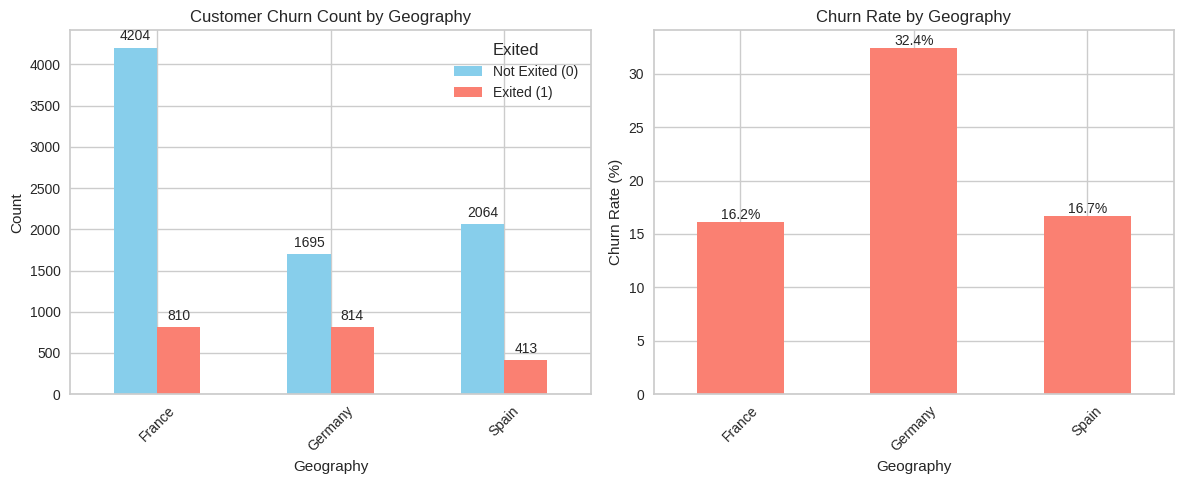

In [ ]:
def plot_churn_analysis_combined(df, category_column, figsize=(14, 5)):
    """
    Plots two side-by-side bar charts for customer churn analysis:
    - Left: Raw count of exited and retained customers in each group
    - Right: Churn rate (percentage of exited customers) in each group

    Inputs:
    - df: DataFrame including the 'Exited' column
    - category_column: Name of the categorical column for analysis (e.g., 'Geography', 'Gender', 'AgeGroup')
    - figsize: Figure size (default (14, 5))
    """

    # Calculate raw counts of exits and retentions
    churn_counts = df.groupby([category_column, 'Exited']).size().unstack(fill_value=0)

    # Calculate Churn Rate
    churn_rate = churn_counts[1] / (churn_counts[0] + churn_counts[1]) * 100  # Convert to percentage

    # Set up side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # ---- 📊 Chart 1: Exited and Retained Customer Counts ----
    colors = ['skyblue', 'salmon']
    churn_counts.plot(kind='bar', stacked=False, ax=axes[0], color=colors)

    axes[0].set_xlabel(category_column)
    axes[0].set_ylabel('Count')
    axes[0].set_title(f'Customer Churn Count by {category_column}')
    axes[0].legend(title='Exited', labels=['Not Exited (0)', 'Exited (1)'])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

    # Display value on top of bars
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

    # ---- 📉 Chart 2: Churn Rate ----
    bars = churn_rate.plot(kind='bar', color='salmon', ax=axes[1])

    axes[1].set_xlabel(category_column)
    axes[1].set_ylabel('Churn Rate (%)')
    axes[1].set_title(f'Churn Rate by {category_column}')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

    # Display percentage on top of bars
    for bar in bars.patches:
        axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                             f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

    # Adjust spacing between the two charts
    plt.tight_layout()
    plt.show()

# ---- 📌 Age Grouping ----
bins = [0, 25, 40, 55, 100]  # Age bins/ranges
labels = ['<25', '25-40', '40-55', '55+']  # Category labels
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# ---- 🚀 Execute Analysis for Different Groups ----
plot_churn_analysis_combined(df, 'AgeGroup', figsize=(14, 5))
plot_churn_analysis_combined(df, 'Gender', figsize=(12, 5))
plot_churn_analysis_combined(df, 'Geography', figsize=(12, 5))


# **Analysis of the 'Family Name' Column**

In [ ]:

# Calculate the frequency (count) of each surname
surname_counts = df['Surname'].value_counts().to_dict()
df['Surname_Frequency'] = df['Surname'].map(surname_counts)
# Convert to categories (using quantiles for equal frequency binning)
df['Surname_Frequency_Category'] = pd.qcut(df['Surname_Frequency'], q=4, labels=['Very Low', 'Low', 'High', 'Very High'])
df['Surname_Frequency_Category'] = df['Surname_Frequency_Category'].astype('category')



In [ ]:
# Calculate the churn rate (mean of 'Exited') for each surname
surname_churn = df.groupby('Surname')['Exited'].mean().sort_values(ascending=False)

# Display surnames with a high churn rate (e.g., above 50%)
high_churn_surnames = surname_churn[surname_churn > 0.5].index
print("Surnames with a churn rate above 50%: ", high_churn_surnames)

# Add a binary column to indicate high-risk surnames
df['High_Churn_Surname'] = df['Surname'].isin(high_churn_surnames).astype('category')
df = df.drop(columns=['Surname'])  # Drop the original column

<ipython-input-26-e58938257917>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby([category_column, 'Exited']).size().unstack(fill_value=0)


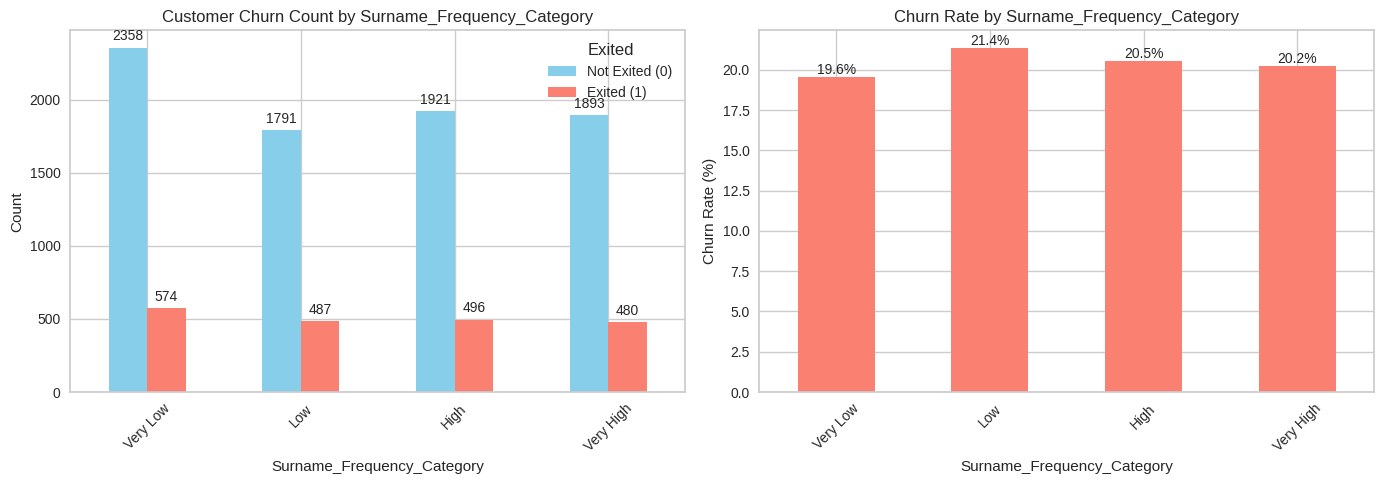

In [ ]:
plot_churn_analysis_combined(df, 'Surname_Frequency_Category', figsize=(14, 5))

# **Analysis of the Impact of Financial and Credit Features on Customer Churn**

<ipython-input-19-c2315213b874>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby('Exited')[column].mean()
<ipython-input-19-c2315213b874>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=column, data=df, palette=['skyblue', 'salmon'])


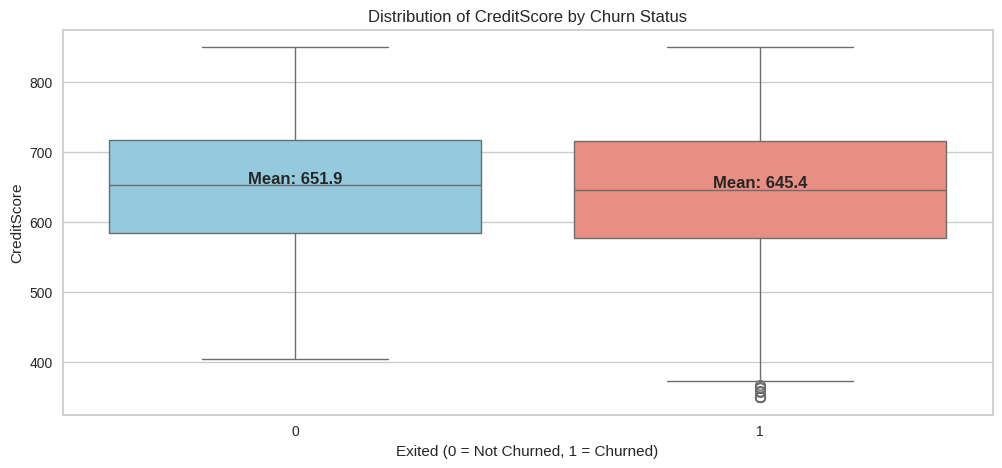

<ipython-input-19-c2315213b874>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby('Exited')[column].mean()
<ipython-input-19-c2315213b874>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=column, data=df, palette=['skyblue', 'salmon'])


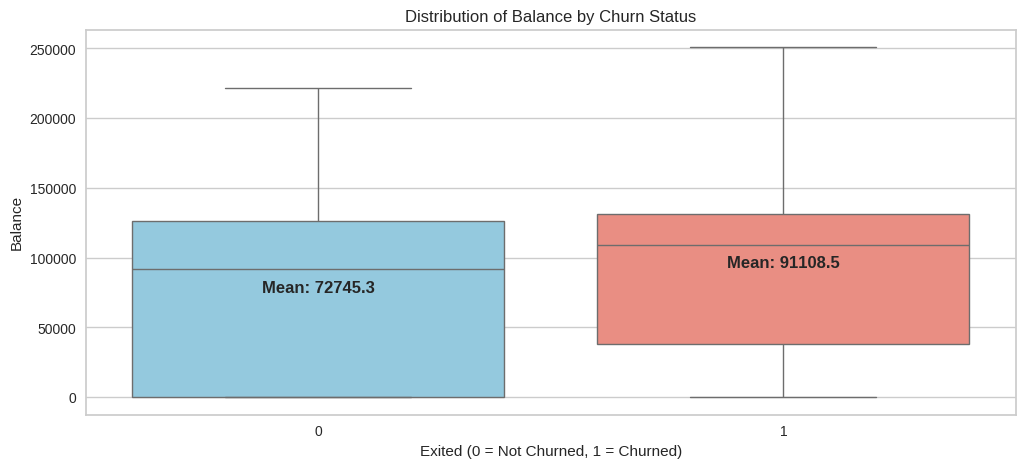

<ipython-input-19-c2315213b874>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby('Exited')[column].mean()
<ipython-input-19-c2315213b874>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=column, data=df, palette=['skyblue', 'salmon'])


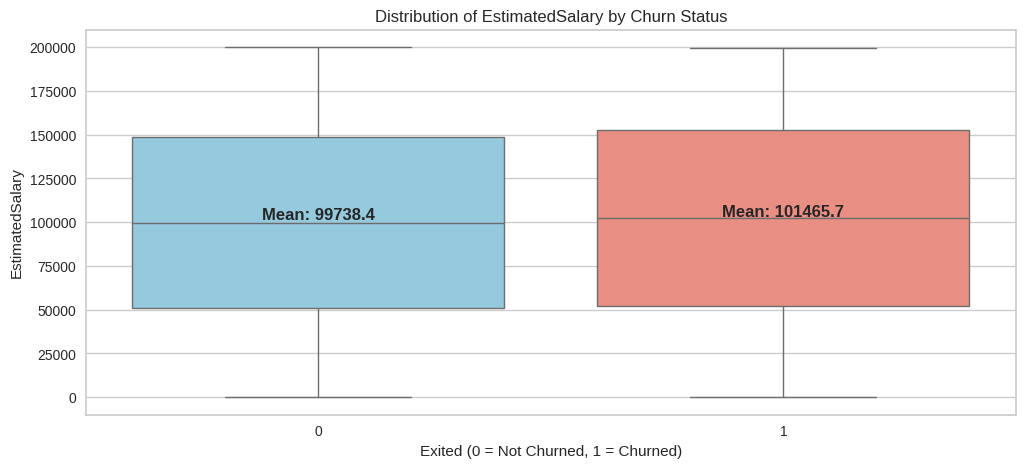

In [ ]:
def plot_financial_impact(df, column, figsize=(12, 5)):
    """
    Visualize the impact of a financial feature on customer churn using:
    - Boxplot to compare data distribution between the two groups (Exited=0 and Exited=1)
    - Calculate and display the mean of each group for comparison

    Inputs:
    - df: DataFrame including the 'Exited' column
    - column: Name of the financial feature (e.g., 'CreditScore', 'Balance', 'EstimatedSalary')
    - figsize: Figure size (default (12, 5))
    """

    # Calculate the mean of the financial feature for each customer group
    mean_values = df.groupby('Exited')[column].mean()

    # ---- 📊 Draw a Boxplot to Compare Value Distributions ----
    plt.figure(figsize=figsize)
    sns.boxplot(x='Exited', y=column, data=df, palette=['skyblue', 'salmon'])

    plt.xlabel('Exited (0 = Not Churned, 1 = Churned)')
    plt.ylabel(column)
    plt.title(f'Distribution of {column} by Churn Status')

    # Display the mean values for each group
    for i, mean in enumerate(mean_values):
        plt.text(i, mean, f'Mean: {mean:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.show()

# ---- 🚀 Execute Analysis for Financial Features ----
plot_financial_impact(df, 'CreditScore', figsize=(12, 5))
plot_financial_impact(df, 'Balance', figsize=(12, 5))
plot_financial_impact(df, 'EstimatedSalary', figsize=(12, 5))


# **T-test**

In [ ]:
from scipy.stats import ttest_ind

def t_test_analysis(df, column):
    """
    Perform an independent samples t-test to check the statistical significance of the difference
    in means of a financial feature between churned and retained customers.
    """
    group_0 = df[df['Exited'] == 0][column]  # Non-churned customers
    group_1 = df[df['Exited'] == 1][column]  # Churned customers

    t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)  # Assuming unequal variances (Welch's t-test)

    print(f"T-test for {column}:")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5f}")

    if p_value < 0.05:
        print(f"✅ The difference in {column} between churned and non-churned customers is statistically significant.\n")
    else:
        print(f"❌ No statistically significant difference in {column} between churned and non-churned customers.\n")

# 🚀 Execute statistical analysis
t_test_analysis(df, 'CreditScore')
t_test_analysis(df, 'Balance')
t_test_analysis(df, 'EstimatedSalary')


T-test for CreditScore:
T-statistic: 2.635, P-value: 0.00846
✅ The difference in CreditScore between churned and non-churned customers is statistically significant.

T-test for Balance:
T-statistic: -12.471, P-value: 0.00000
✅ The difference in Balance between churned and non-churned customers is statistically significant.

T-test for EstimatedSalary:
T-statistic: -1.203, P-value: 0.22892
❌ No statistically significant difference in EstimatedSalary between churned and non-churned customers.



# **ANOVA Test (One-Way Analysis of Variance)**

In [ ]:
from scipy.stats import f_oneway

def anova_analysis(df, column, group_column='Exited'):
    """
    Perform a One-Way ANOVA test to examine the difference in the mean of a financial feature between groups.
    """
    # Group the DataFrame by the categorical variable (e.g., 'Exited') and extract the values of the target column
    groups = [group[column].values for _, group in df.groupby(group_column)]

    f_stat, p_value = f_oneway(*groups)  # Perform the ANOVA test

    print(f"ANOVA test for {column} based on {group_column}:")
    print(f"F-statistic: {f_stat:.3f}, P-value: {p_value:.5f}")

    if p_value < 0.05:
        print(f"✅ The difference in {column} between groups is statistically significant.\n")
    else:
        print(f"❌ No statistically significant difference in {column} between groups.\n")

# 🚀 Execute ANOVA test for financial variables
anova_analysis(df, 'CreditScore')
anova_analysis(df, 'Balance')
anova_analysis(df, 'EstimatedSalary')


ANOVA test for CreditScore based on Exited:
F-statistic: 7.345, P-value: 0.00674
✅ The difference in CreditScore between groups is statistically significant.

ANOVA test for Balance based on Exited:
F-statistic: 142.474, P-value: 0.00000
✅ The difference in Balance between groups is statistically significant.

ANOVA test for EstimatedSalary based on Exited:
F-statistic: 1.463, P-value: 0.22644
❌ No statistically significant difference in EstimatedSalary between groups.



<ipython-input-26-145901829e58>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[column].values for _, group in df.groupby(group_column)]  # گروه‌بندی بر اساس متغیر دسته‌ای


# **Visualization of Financial Feature Distributions by Churn Status**

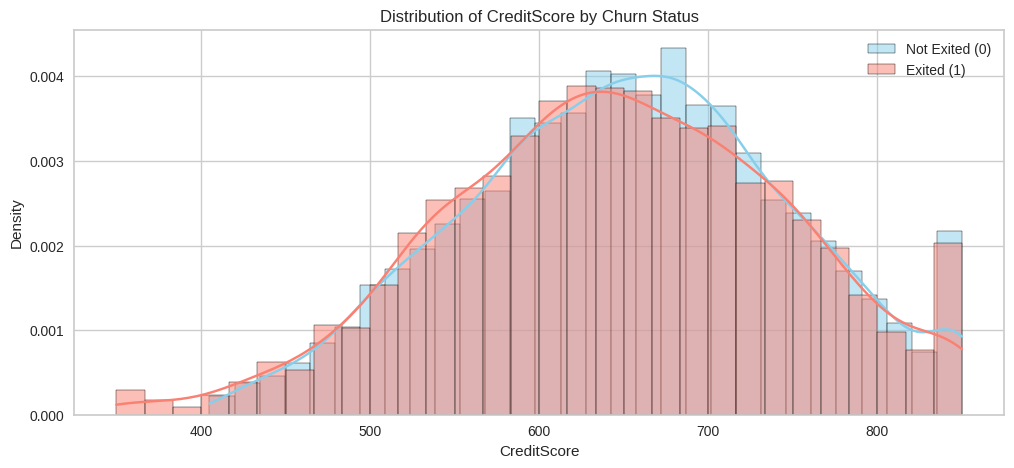

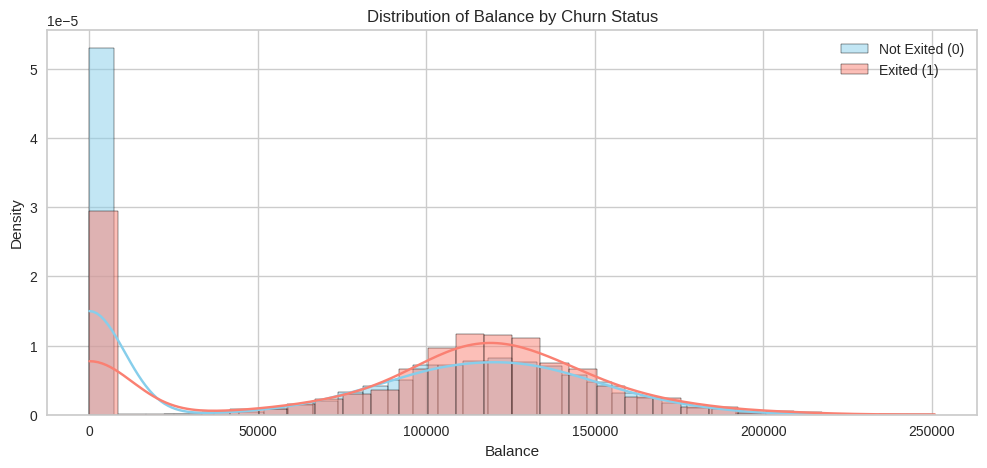

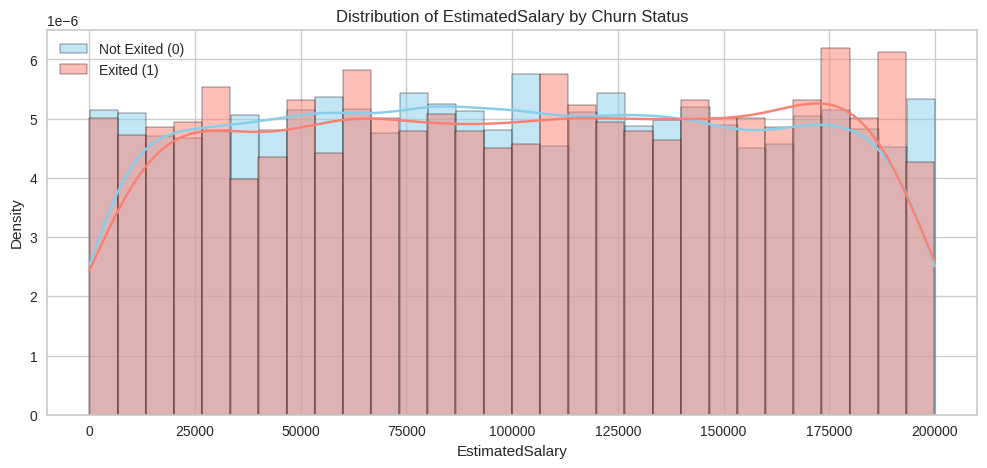

In [ ]:
def plot_histogram_by_churn(df, column, bins=30):
    """
    Displays the distribution of a financial feature for retained and churned customers
    as a histogram.
    """
    plt.figure(figsize=(12, 5))

    # Plot histogram for each group (Exited = 0 and Exited = 1)
    sns.histplot(df[df['Exited'] == 0][column], bins=bins, kde=True, color='skyblue', label='Not Exited (0)', stat='density')
    sns.histplot(df[df['Exited'] == 1][column], bins=bins, kde=True, color='salmon', label='Exited (1)', stat='density')

    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Distribution of {column} by Churn Status')
    plt.legend()
    plt.show()

# ---- 🚀 Execute Analysis ----
plot_histogram_by_churn(df, 'CreditScore')
plot_histogram_by_churn(df, 'Balance')
plot_histogram_by_churn(df, 'EstimatedSalary')

# **Analysis of Customer Interaction with the Bank**

<ipython-input-18-3287e6143adf>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby([category_column, 'Exited']).size().unstack(fill_value=0)


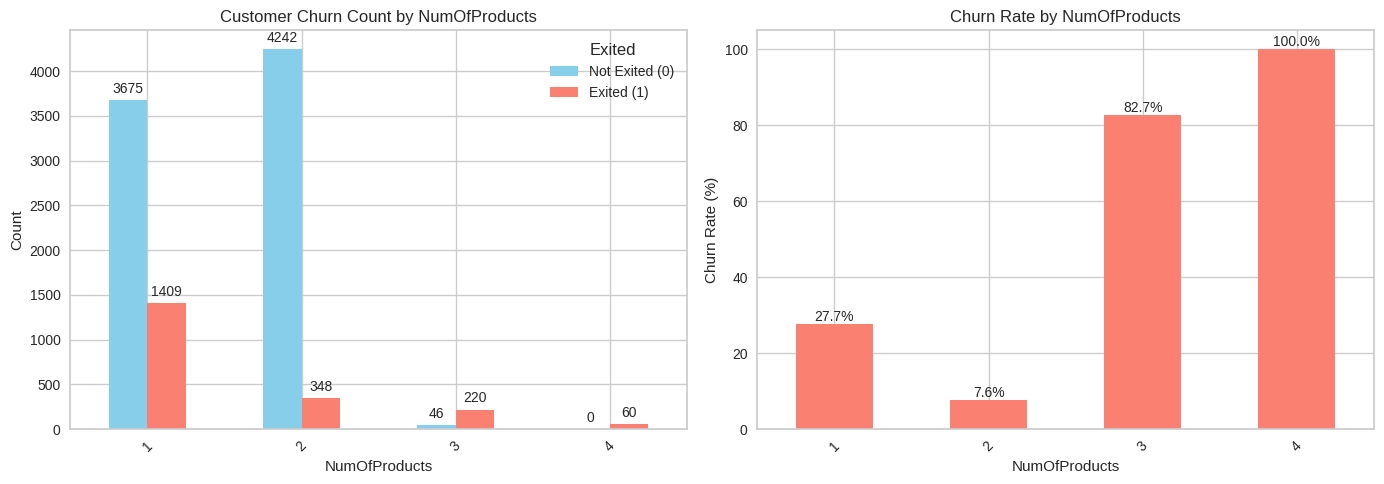

<ipython-input-18-3287e6143adf>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby([category_column, 'Exited']).size().unstack(fill_value=0)


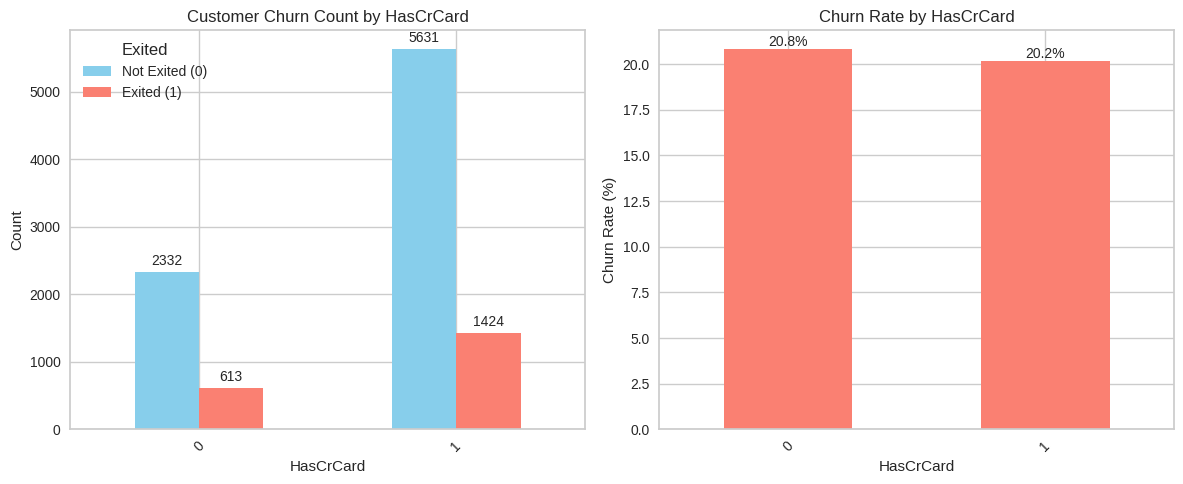

<ipython-input-18-3287e6143adf>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby([category_column, 'Exited']).size().unstack(fill_value=0)


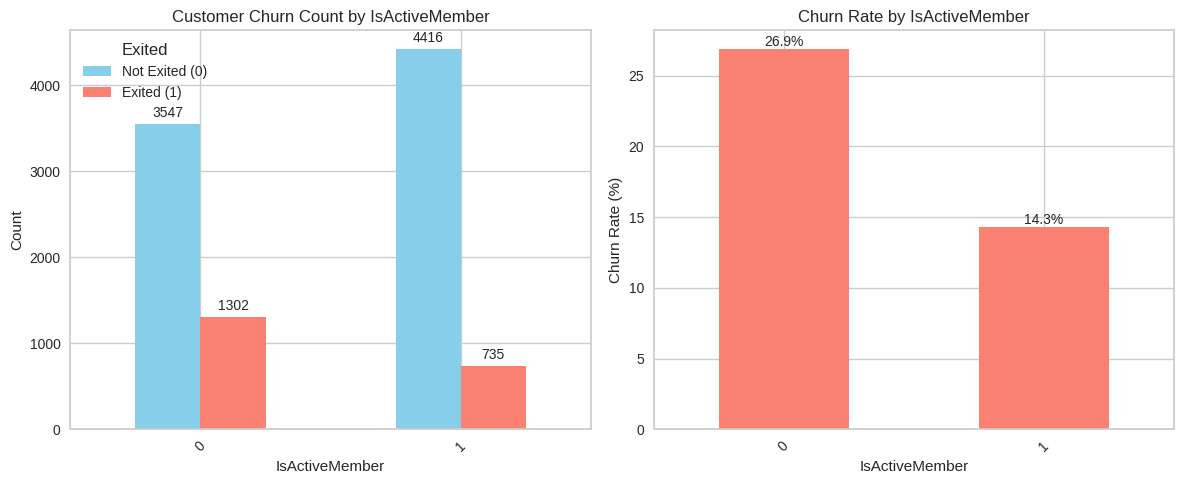

<ipython-input-18-3287e6143adf>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby([category_column, 'Exited']).size().unstack(fill_value=0)


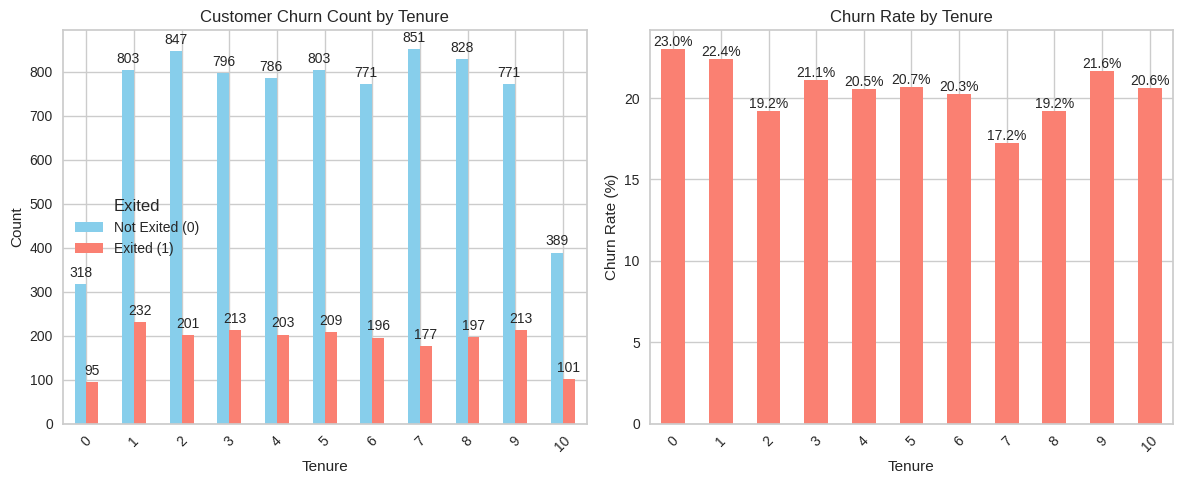

In [ ]:
plot_churn_analysis_combined(df, 'NumOfProducts', figsize=(14, 5))
plot_churn_analysis_combined(df, 'HasCrCard', figsize=(12, 5))
plot_churn_analysis_combined(df, 'IsActiveMember', figsize=(12, 5))
plot_churn_analysis_combined(df, 'Tenure', figsize=(12, 5))


In [ ]:
from scipy.stats import chi2_contingency

def chi_square_test(df, column):
    """
    اجرای تست کای‌دو برای بررسی وابستگی بین یک ویژگی دسته‌ای و ریزش مشتری
    """
    contingency_table = pd.crosstab(df[column], df['Exited'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"Chi-Square Test for {column}:")
    print(f"Chi2 Statistic: {chi2:.2f}, P-value: {p:.5f}")
    if p < 0.05:
        print(f"✅ The relationship between {column} and churn is statistically significant.\n")
    else:
        print(f"❌ No significant relationship between {column} and churn.\n")

# ---- 🚀 اجرای تست کای‌دو ----
chi_square_test(df, 'NumOfProducts')
chi_square_test(df, 'HasCrCard')
chi_square_test(df, 'IsActiveMember')
chi_square_test(df, 'Tenure')


Chi-Square Test for NumOfProducts:
Chi2 Statistic: 1503.63, P-value: 0.00000
✅ The relationship between NumOfProducts and churn is statistically significant.

Chi-Square Test for HasCrCard:
Chi2 Statistic: 0.47, P-value: 0.49237
❌ No significant relationship between HasCrCard and churn.

Chi-Square Test for IsActiveMember:
Chi2 Statistic: 242.99, P-value: 0.00000
✅ The relationship between IsActiveMember and churn is statistically significant.

Chi-Square Test for Tenure:
Chi2 Statistic: 13.90, P-value: 0.17758
❌ No significant relationship between Tenure and churn.



# **Analyzing the Effect of Gender and Geography on Customer Churn**

In [ ]:
crosstab = df.groupby(['Gender', 'Geography' , 'Exited']).size().unstack(fill_value=0)
crosstab


<ipython-input-19-5861c6044c51>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crosstab = df.groupby(['Gender', 'Geography' , 'Exited']).size().unstack(fill_value=0)


Exited               0    1
Gender Geography           
Female France     1801  460
       Germany     745  448
       Spain       858  231
Male   France     2403  350
       Germany     950  366
       Spain      1206  182

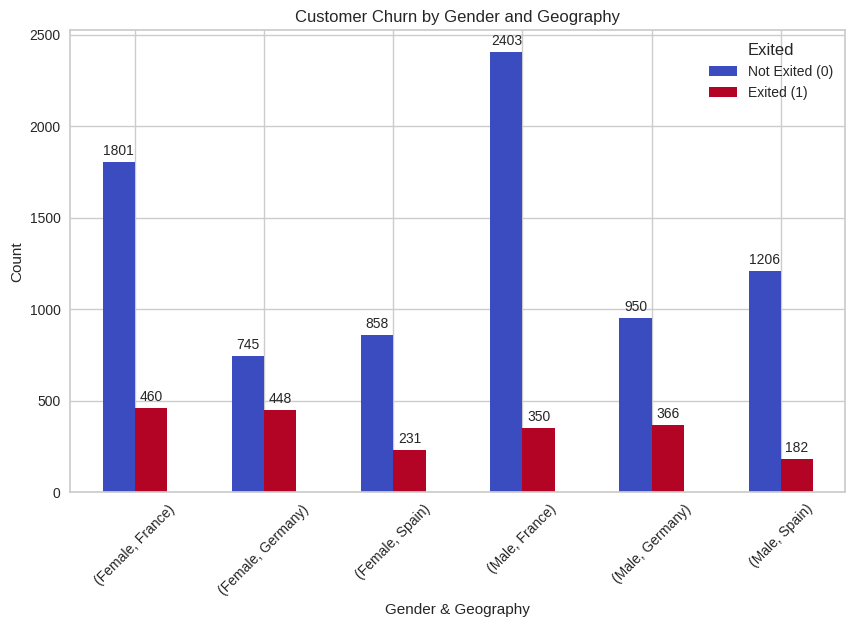

In [ ]:
ax = crosstab.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='coolwarm')

plt.xlabel('Gender & Geography')
plt.ylabel('Count')
plt.title('Customer Churn by Gender and Geography')
plt.legend(title='Exited', labels=['Not Exited (0)', 'Exited (1)'])
plt.xticks(rotation=45)


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.show()


# **Detecting outliers**

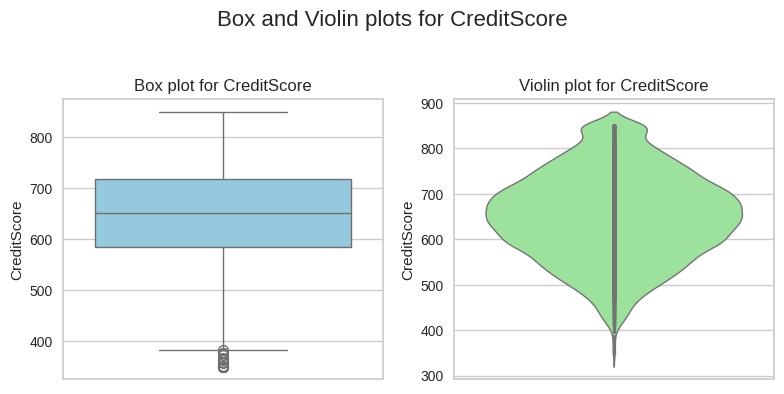

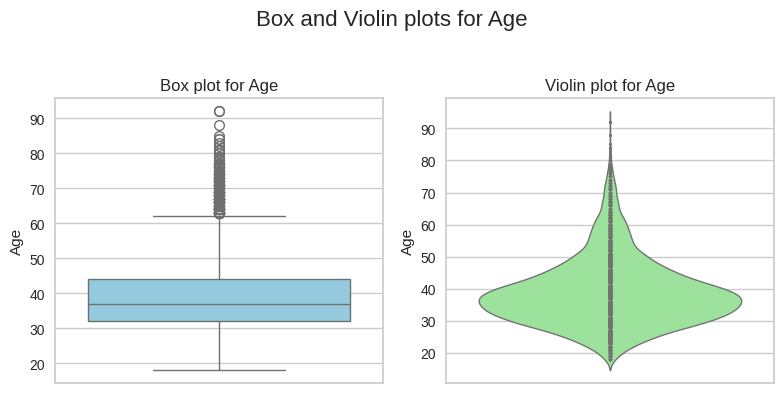

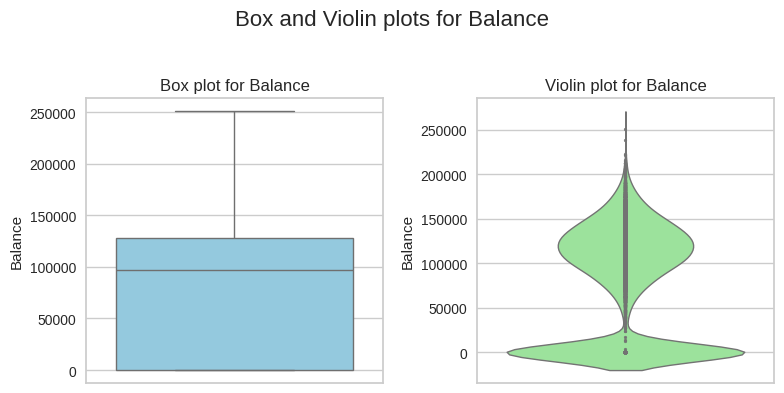

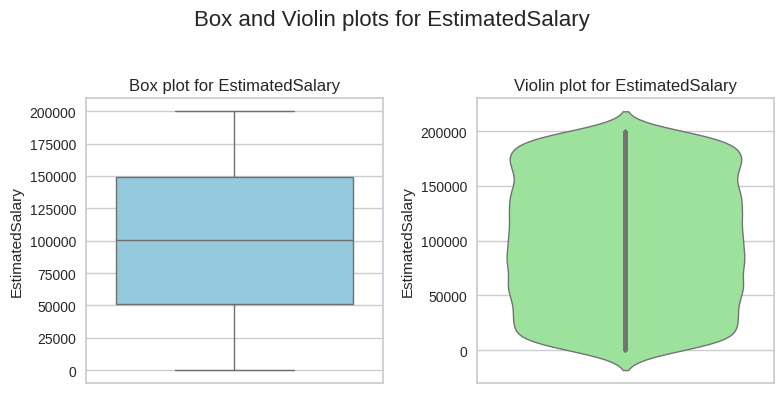

In [ ]:
# List of numerical columns to create plots for
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Iterate over each column
for column in numerical_features:
    # Create a figure with two subplots (box plot and violin plot)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle(f"Box and Violin plots for {column}", fontsize=16)  # Set a title for the entire figure

    # Create a box plot on the first subplot
    sns.boxplot(y=df[column], ax=axes[0], color='skyblue')  # Create a box plot, specifying the column and subplot
    axes[0].set_title(f"Box plot for {column}")  # Set a title for the box plot

    # Create a violin plot on the second subplot
    sns.violinplot(y=df[column], ax=axes[1], color='lightgreen', inner="point", linewidth=1)  # Create a violin plot, specifying the column, subplot, and customization options
    axes[1].set_title(f"Violin plot for {column}")  # Set a title for the violin plot

    # Adjust the layout and display the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the main title
    plt.show()

**Z-Score**

In [ ]:
def detect_outliers_zscore(df, threshold=3):
    """
    Detects outliers using Z-score.

    Args:
        df: A pandas DataFrame.
        threshold: The Z-score threshold.

    Returns:
        A pandas DataFrame containing the outliers.
    """

    # Calculate Z-scores for all numerical features
    z_scores = np.abs(stats.zscore(df[numerical_features]))

    # Find rows where at least one feature has a Z-score greater than the threshold
    outliers = (z_scores > threshold).any(axis=1)

    # Return a DataFrame containing the outliers
    return df[outliers]

# Example usage:
# Assuming df is your DataFrame
outliers_df = detect_outliers_zscore(df, threshold=3)
print("Number of outliers:", outliers_df.shape[0])
#######
outliers_df


Number of outliers: 141


CreditScore Geography  Gender   Age Tenure    Balance NumOfProducts  \
85          652.0     Spain  Female  75.0     10       0.00             2   
158         646.0    France  Female  73.0      6   97259.25             1   
230         673.0    France    Male  72.0      1       0.00             2   
252         681.0    France  Female  79.0      0       0.00             2   
310         652.0    France  Female  80.0      4       0.00             2   
...           ...       ...     ...   ...    ...        ...           ...   
9646        850.0     Spain    Male  71.0     10   69608.14             1   
9671        649.0   Germany    Male  78.0      4   68345.86             2   
9736        659.0     Spain    Male  78.0      2  151675.65             1   
9894        521.0    France  Female  77.0      6       0.00             2   
9936        609.0    France    Male  77.0      1       0.00             1   

     HasCrCard IsActiveMember  EstimatedSalary Exited  
85           1              1        114675.75      0  
158          0              1        104719.66      0  
230          0              1        111981.19      0  
252          0              1        170968.99      0  
310          1              1        188603.07      0  
...        ...            ...              ...    ...  
9646         1              0         97893.40      1  
9671         1              1        142566.75      0  
9736         0              1         49978.67      0  
9894         1              1         49054.10      0  
9936         0              1         18708.76      0  

[141 rows x 11 columns]

# **preprocessing**

Class distribution before SMOTE: Counter({0: 6356, 1: 1644})
Class distribution after SMOTE: Counter({0: 6356, 1: 6356})


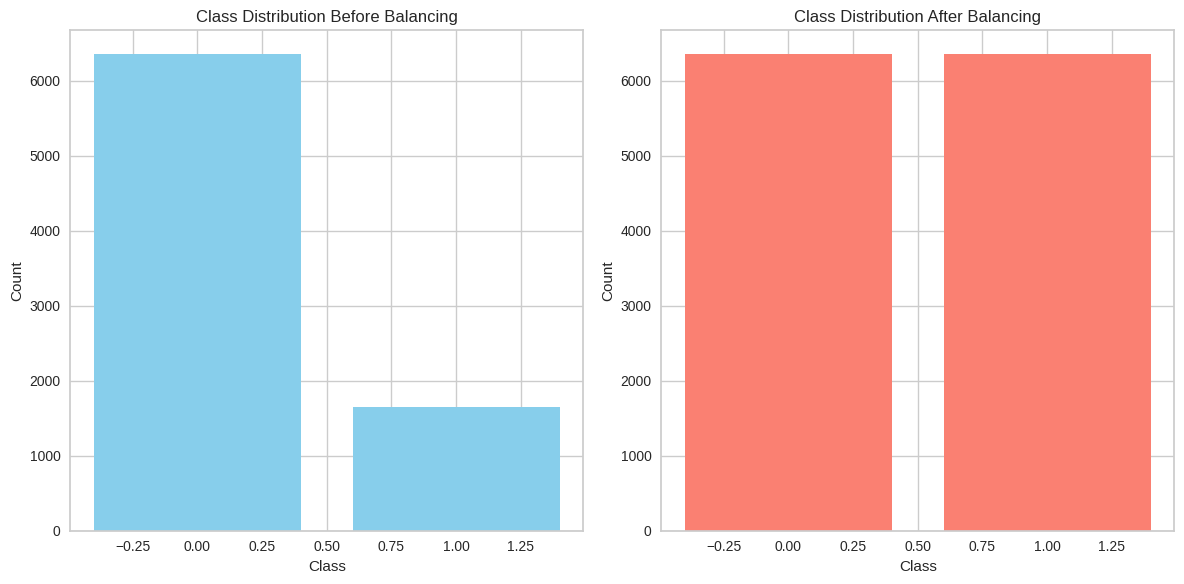

In [ ]:
"""
In this section of the code, we're removing the first three columns from our DataFrame.
This is because we've determined through our analysis that these particular columns do
not contribute significantly to the model's ability to make accurate predictions.
"""
df = df.iloc[:, 3:]
# df = df.drop(df.columns[:3], axis=1)

# Select all columns except the last one (features) and assign them to X
X = df.iloc[:, :-1]

# Select the last column (target) and assign it to y
y = df.iloc[:, -1]


# X = df.drop('target', axis=1)
# y = df['target']

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# numerical_columns = ['CreditScore', 'Age', 'EstimatedSalary'] # Assuming these were the columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Update the categorical feature indices to reflect dropped columns
        # Assuming the original categorical columns were 4th and 5th (index 3 and 4 after dropping)
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), [1, 2]), # Encode categorical features - updated indices
        ('num', StandardScaler(),['CreditScore', 'Age', 'EstimatedSalary']) # Now references the correct columns in the modified dataframe
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('feature_selection', VarianceThreshold(threshold=0.1)),  # Remove low-variance features
    # ('pca', PCA(n_components=10))  # Reduce dimensionality
])

# Preprocess training and test data
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Oversample minority class using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_transformed, y_train)



# Distribution of classes before SMOTE
class_counts_before = Counter(y_train)
print("Class distribution before SMOTE:", Counter(y_train))
# Distribution of classes after SMOTE
class_counts_after = Counter(y_res)
print("Class distribution after SMOTE:", Counter(y_res))

# Visualize class distribution before and after SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(class_counts_before.keys(), class_counts_before.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before Balancing')

plt.subplot(1, 2, 2)
plt.bar(class_counts_after.keys(), class_counts_after.values(), color='salmon')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After Balancing')

plt.tight_layout()
plt.show()

In [ ]:
X_df =pd.DataFrame(X_res, columns=pipeline.get_feature_names_out())
X_df.head(3)

cat__Geography_France  cat__Geography_Germany  cat__Geography_Spain  \
0                    1.0                     0.0                   0.0   
1                    0.0                     1.0                   0.0   
2                    0.0                     0.0                   1.0   

   cat__Gender_Female  cat__Gender_Male  num__CreditScore  num__Age  \
0                 0.0               1.0          0.356500 -0.655786   
1                 0.0               1.0         -0.203898  0.294938   
2                 0.0               1.0         -0.961472 -1.416365   

   num__EstimatedSalary  remainder__Tenure  remainder__Balance  \
0              1.367670                6.0                0.00   
1              1.661254                4.0           119624.60   
2             -0.252807                3.0           114739.92   

   remainder__NumOfProducts  remainder__HasCrCard  remainder__IsActiveMember  
0                       2.0                   1.0                        1.0  
1                       2.0                   1.0                        1.0  
2                       1.0                   1.0                        0.0

In [ ]:
def detect_outliers(X, contamination=0.05, n_neighbors=20, nu=0.05, gamma=0.1):
    """
    Perform outlier detection using Isolation Forest, Local Outlier Factor, and One-Class SVM.

    Parameters:
    X (pd.DataFrame or np.array): Input data for outlier detection.
    contamination (float): Proportion of data to consider as outliers.
    n_neighbors (int): Number of neighbors to use for Local Outlier Factor.
    nu (float): Upper bound on the fraction of margin errors in One-Class SVM.
    gamma (float): Kernel coefficient for One-Class SVM.

    Returns:
    pd.DataFrame: DataFrame containing the original data and outlier labels from each method.
    """
    # Ensure X is a DataFrame
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)

    # Isolation Forest
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    iso_outliers = iso_forest.fit_predict(X)

    # Local Outlier Factor
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    lof_outliers = lof.fit_predict(X)

    # One-Class SVM
    one_class_svm = OneClassSVM(nu=nu, kernel="rbf", gamma=gamma)
    svm_outliers = one_class_svm.fit_predict(X)

    # Compile results into a DataFrame
    results = X_train.copy()
    results['IsolationForest'] = iso_outliers
    results['LocalOutlierFactor'] = lof_outliers
    results['OneClassSVM'] = svm_outliers

    return results



results = detect_outliers(X_train_transformed)
#####
results.head(3)


CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9254          686    France    Male   32       6       0.00              2   
1561          632   Germany    Male   42       4  119624.60              2   
1670          559     Spain    Male   24       3  114739.92              1   
6087          561    France  Female   27       9  135637.00              1   
6669          517    France    Male   56       9  142147.32              1   
...           ...       ...     ...  ...     ...        ...            ...   
5734          768    France    Male   54       8   69712.74              1   
5191          682    France  Female   58       1       0.00              1   
5390          735    France  Female   38       1       0.00              3   
860           667    France    Male   43       8  190227.46              1   
7270          697   Germany    Male   51       1  147910.30              1   

      HasCrCard  IsActiveMember  EstimatedSalary  IsolationForest  \
9254          1               1        179093.26                1   
1561          1               1        195978.86                1   
1670          1               0         85891.02                1   
6087          1               0        153080.40                1   
6669          0               0         39488.04                1   
...         ...             ...              ...              ...   
5734          1               1         69381.05                1   
5191          1               1           706.50                1   
5390          0               0         92220.12                1   
860           1               0         97508.04                1   
7270          1               1         53581.14                1   

      LocalOutlierFactor  OneClassSVM  
9254                   1            1  
1561                   1           -1  
1670                   1            1  
6087                   1            1  
6669                   1            1  
...                  ...          ...  
5734                   1           -1  
5191                   1            1  
5390                   1            1  
860                    1           -1  
7270                   1            1  

[8000 rows x 13 columns]

In [ ]:
def count_outliers(results):
    """
    Count the number of outliers detected by each method.

    Parameters:
    results (pd.DataFrame): DataFrame containing outlier labels from each method.

    Returns:
    pd.Series: Number of outliers detected by each method.
    """
   # Count outliers (values ​​-1) for each method
    outlier_counts = results[['IsolationForest', 'LocalOutlierFactor', 'OneClassSVM']].apply(lambda col: (col == -1).sum())
    return outlier_counts


outlier_counts = count_outliers(results)
#######
outlier_counts


IsolationForest        400
LocalOutlierFactor     400
OneClassSVM           2508
dtype: int64

In [ ]:
results['OutlierConsensus'] = results[['IsolationForest', 'LocalOutlierFactor', 'OneClassSVM']].sum(axis=1)
consensus_outliers = (results['OutlierConsensus'] == -3).sum()  # Outliers identified by at least two methods
print("Consensus outliers:", consensus_outliers)


Consensus outliers: 9


In [ ]:
# Filtering outliers identified by at least two methods
consensus_outliers_df = results[results['OutlierConsensus'] == -3]

print("Consensus outliers:")
#######
consensus_outliers_df.head(3)


Consensus outliers:


CreditScore Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
5235          645    France  Female   68       9      0.0              4   
3142          697    France  Female   76       7      0.0              2   
8379          434     Spain    Male   55       6      0.0              1   

      HasCrCard  IsActiveMember  EstimatedSalary  IsolationForest  \
5235          1               1        176353.87               -1   
3142          0               1        188772.45               -1   
8379          0               1         73562.05               -1   

      LocalOutlierFactor  OneClassSVM  OutlierConsensus  
5235                  -1           -1                -3  
3142                  -1           -1                -3  
8379                  -1           -1                -3

In [ ]:
consensus_outlier_indices = consensus_outliers_df.index
print("Indices of consensus outliers:", consensus_outlier_indices.tolist())


Indices of consensus outliers: [1328, 1849, 3562, 5747, 6093, 7487, 7505, 8415, 10109, 10132]


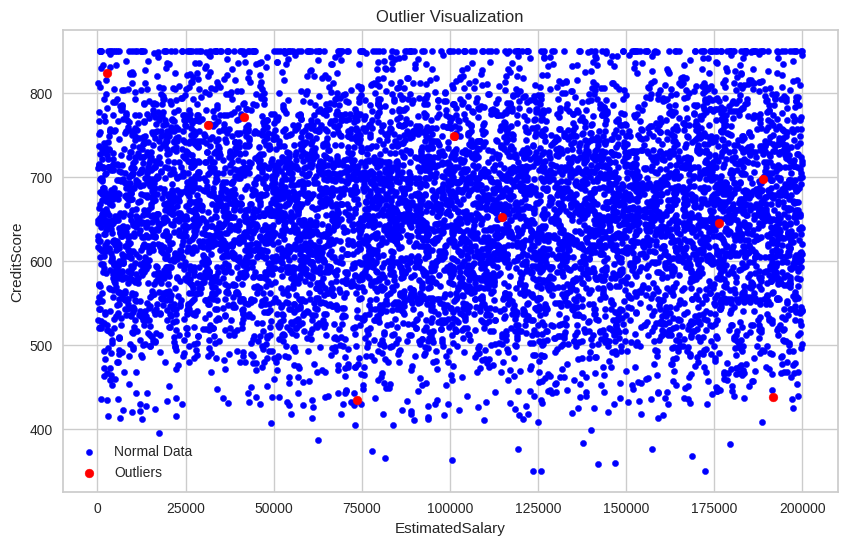

In [ ]:
normal_data = results[results['OutlierConsensus'] > -3]
outlier_data = results[results['OutlierConsensus'] == -3]

plt.figure(figsize=(10, 6))
plt.scatter(normal_data['EstimatedSalary'], normal_data['CreditScore'], label="Normal Data", c='blue', s=20)
plt.scatter(outlier_data['EstimatedSalary'], outlier_data['CreditScore'], label="Outliers", c='red', s=40)
plt.xlabel("EstimatedSalary")
plt.ylabel("CreditScore")
plt.title("Outlier Visualization")
plt.legend()
plt.show()

In [ ]:
# Get column names from the preprocessed X_train
column_names = pipeline.get_feature_names_out()

# Create a DataFrame from X_res with the extracted column names
X_res_df = pd.DataFrame(X_res, columns=column_names)
X_res_df.head(3)

# Combine X_res_df and y_res into a single DataFrame
# resampled_df = pd.concat([X_res_df, y_res], axis=1)

cat__Geography_France  cat__Geography_Germany  cat__Geography_Spain  \
0                    1.0                     0.0                   0.0   
1                    0.0                     1.0                   0.0   
2                    0.0                     0.0                   1.0   

   cat__Gender_Female  cat__Gender_Male  num__CreditScore  num__Age  \
0                 0.0               1.0          0.356500 -0.655786   
1                 0.0               1.0         -0.203898  0.294938   
2                 0.0               1.0         -0.961472 -1.416365   

   num__EstimatedSalary  remainder__Tenure  remainder__Balance  \
0              1.367670                6.0                0.00   
1              1.661254                4.0           119624.60   
2             -0.252807                3.0           114739.92   

   remainder__NumOfProducts  remainder__HasCrCard  remainder__IsActiveMember  
0                       2.0                   1.0                        1.0  
1                       2.0                   1.0                        1.0  
2                       1.0                   1.0                        0.0

In [ ]:
# print("Before preprocessing:", X_train.shape)
# print("After preprocessing:", X_train_transformed.shape)
# print("After KMeans:", len(km))


Before preprocessing: (8000, 10)
After preprocessing: (8000, 13)


NameError: name 'km' is not defined

# **Random Forest Customer Churn Probability**

In [ ]:
# Build the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_res, y_res)

# Make predictions
y_pred = model.predict(X_test_transformed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.868
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.73      0.52      0.61       393

    accuracy                           0.87      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [ ]:
# Calculate the probability of customer churn for each customer
y_probs = model.predict_proba(X_test_transformed)[:, 1]  # The second column shows the probability of churn (Exited=1)

# Convert to DataFrame for analysis
results = X_test.copy()
results['Churn_Probability'] = y_probs
results['Predicted_Exited'] = model.predict(X_test_transformed)
# Re-predict based on a custom threshold (e.g., 0.3 instead of the default 0.5)
results['Predicted_Exited'] = (results['Churn_Probability'] >= 0.3).astype(int)

# Display the 10 customers with the highest probability of leaving the bank
results_sorted = results.sort_values(by='Churn_Probability', ascending=False)
# print(results_sorted.head(10))  # 10 customers with the highest probability of churning


      CreditScore Geography  Gender   Age Tenure    Balance NumOfProducts  \
9476        650.0   Germany  Female  48.0      7  138232.24             1   
3898        662.0   Germany    Male  59.0      2  104568.41             1   
4607        653.0    France    Male  51.0      3       0.00             1   
2614        546.0   Germany  Female  58.0      3  106458.31             4   
5576        566.0   Germany    Male  65.0      4  120100.41             1   
5137        698.0    France  Female  51.0      6  144237.91             4   
3206        515.0   Germany    Male  60.0      9  113715.36             1   
1314        675.0    France    Male  54.0      2       0.00             1   
7487        651.0    France  Female  56.0      4       0.00             1   
6255        547.0   Germany    Male  55.0      4  111362.76             3   

     HasCrCard IsActiveMember  EstimatedSalary  Churn_Probability  \
9476         1              0         57594.78               1.00   
3898         1

In [ ]:
results_sorted.head(10)

CreditScore Geography  Gender   Age Tenure    Balance NumOfProducts  \
9476        650.0   Germany  Female  48.0      7  138232.24             1   
3898        662.0   Germany    Male  59.0      2  104568.41             1   
4607        653.0    France    Male  51.0      3       0.00             1   
2614        546.0   Germany  Female  58.0      3  106458.31             4   
5576        566.0   Germany    Male  65.0      4  120100.41             1   
5137        698.0    France  Female  51.0      6  144237.91             4   
3206        515.0   Germany    Male  60.0      9  113715.36             1   
1314        675.0    France    Male  54.0      2       0.00             1   
7487        651.0    France  Female  56.0      4       0.00             1   
6255        547.0   Germany    Male  55.0      4  111362.76             3   

     HasCrCard IsActiveMember  EstimatedSalary  Churn_Probability  \
9476         1              0         57594.78               1.00   
3898         1              0          8059.44               0.99   
4607         1              0        170426.65               0.97   
2614         1              0        128881.87               0.97   
5576         1              0        107563.16               0.97   
5137         1              0        157143.61               0.97   
3206         1              0         18424.24               0.97   
1314         1              0        149583.67               0.96   
7487         0              0         84383.22               0.96   
6255         1              0         16922.28               0.95   

      Predicted_Exited  
9476                 1  
3898                 1  
4607                 1  
2614                 1  
5576                 1  
5137                 1  
3206                 1  
1314                 1  
7487                 1  
6255                 1

# **Visual and statistical analysis of customer churn probability based on batch characteristics**

<ipython-input-16-d34c1d4ca50a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_prob = high_risk.groupby(col)['Churn_Probability'].mean().sort_values(ascending=False)



📌 میانگین احتمال ریزش برای Geography:

           Churn_Probability
Geography                   
Germany             0.720000
France              0.713462
Spain               0.691707


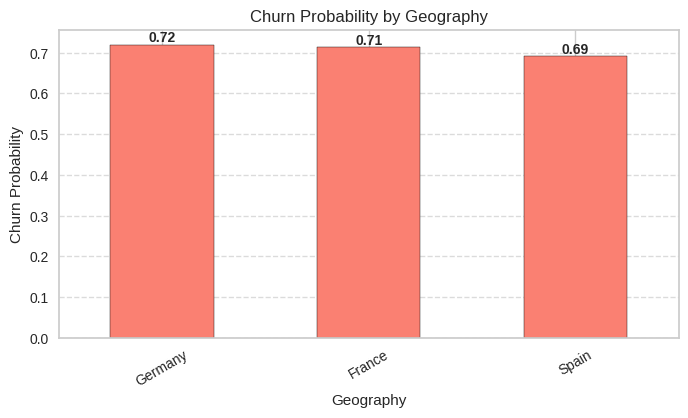


📌 میانگین احتمال ریزش برای Gender:

        Churn_Probability
Gender                   
Female           0.722874
Male             0.700661


<ipython-input-16-d34c1d4ca50a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_prob = high_risk.groupby(col)['Churn_Probability'].mean().sort_values(ascending=False)


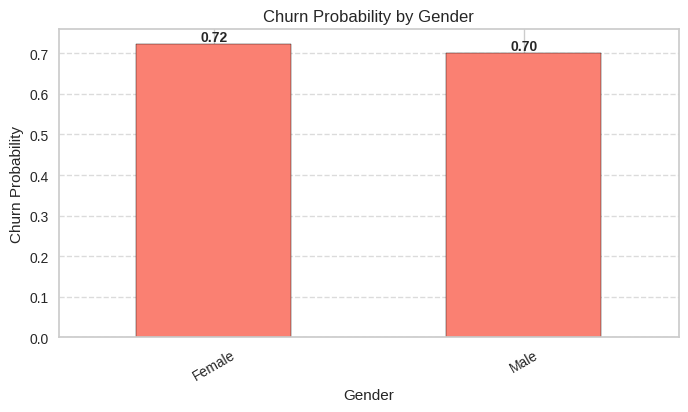

<ipython-input-16-d34c1d4ca50a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_prob = high_risk.groupby(col)['Churn_Probability'].mean().sort_values(ascending=False)



📌 میانگین احتمال ریزش برای NumOfProducts:

               Churn_Probability
NumOfProducts                   
4                       0.817333
3                       0.761020
1                       0.702714
2                       0.640000


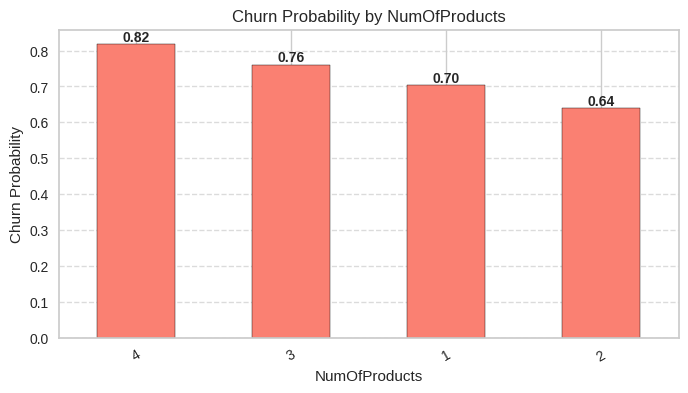

<ipython-input-16-d34c1d4ca50a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_prob = high_risk.groupby(col)['Churn_Probability'].mean().sort_values(ascending=False)



📌 میانگین احتمال ریزش برای HasCrCard:

           Churn_Probability
HasCrCard                   
1                   0.714400
0                   0.711714


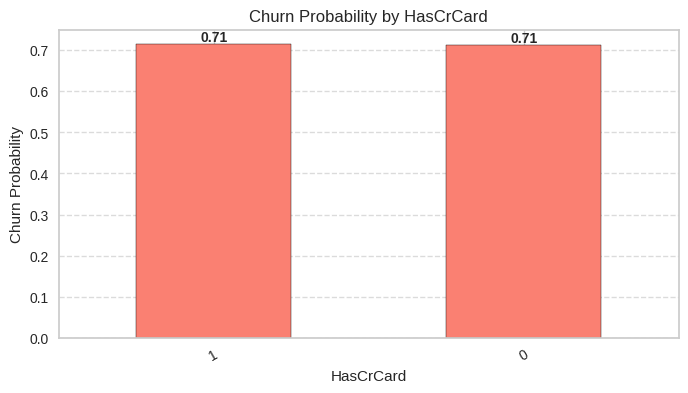

<ipython-input-16-d34c1d4ca50a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_prob = high_risk.groupby(col)['Churn_Probability'].mean().sort_values(ascending=False)



📌 میانگین احتمال ریزش برای IsActiveMember:

                Churn_Probability
IsActiveMember                   
0                        0.737548
1                        0.656897


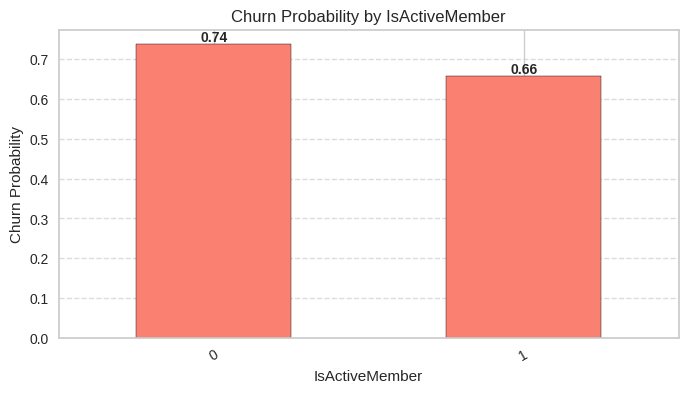

<ipython-input-16-d34c1d4ca50a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_prob = high_risk.groupby(col)['Churn_Probability'].mean().sort_values(ascending=False)



📌 میانگین احتمال ریزش برای Tenure:

        Churn_Probability
Tenure                   
7                0.768636
6                0.760000
3                0.737600
0                0.737273
2                0.736667
4                0.732941
1                0.696316
5                0.695946
9                0.690588
8                0.688182
10               0.615385


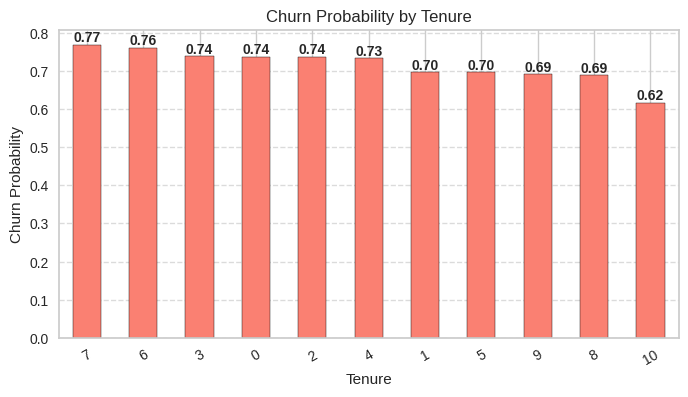

In [ ]:
# Select categorical columns
categorical_columns = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure']

# Check churn probability for each categorical feature
for col in categorical_columns:
    # Calculate the mean churn probability for each category in the high-risk subset
    churn_prob = high_risk.groupby(col)['Churn_Probability'].mean().sort_values(ascending=False)

    # Display the table
    print(f"\n📌 Mean Churn Probability for {col}:\n")
    print(churn_prob.to_frame())  # Convert to DataFrame for better output display

    # Plot the bar chart
    plt.figure(figsize=(8, 4))
    churn_prob.plot(kind='bar', color='salmon', edgecolor='black')

    plt.xlabel(col)
    plt.ylabel('Churn Probability')
    plt.title(f'Churn Probability by {col}')
    plt.xticks(rotation=30)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display value on each bar
    for i, value in enumerate(churn_prob):
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.show()


# **Extracting the importance of features**

<ipython-input-44-73a29319ff37>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.sort_values(ascending=False), y=feature_importance.sort_values(ascending=False).index, palette='coolwarm')


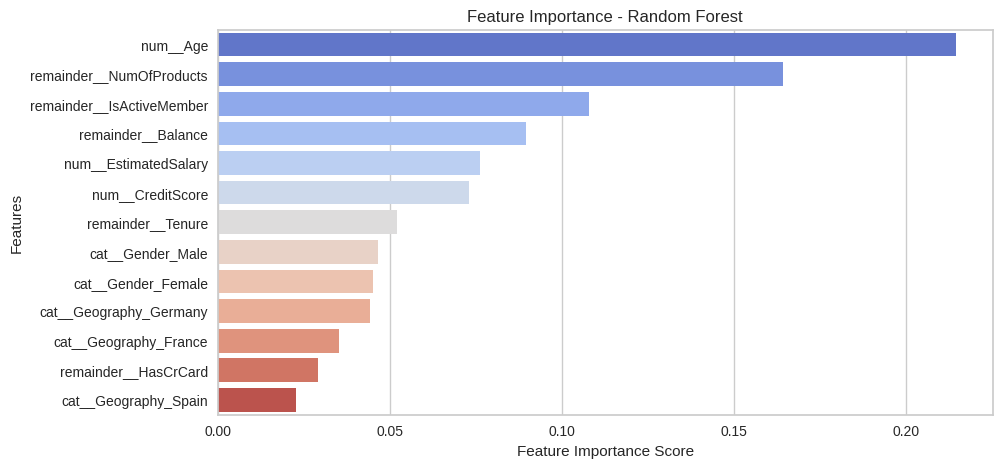

In [ ]:
# Extracting the importance of features
feature_importance = pd.Series(model.feature_importances_, index=X_df.columns)

# Draw a graph of the importance of features
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.sort_values(ascending=False), y=feature_importance.sort_values(ascending=False).index, palette='coolwarm')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.show()

In [ ]:
print("Shape of X_test_transformed:", X_test_transformed.shape)
print("Shape of shap_values:", shap_values.shape)
print("Shape of shap_values_class_1:", shap_values_class_1.shape)
print("Number of feature names:", len(X_df.columns))

Shape of X_test_transformed: (2000, 13)
Shape of shap_values: (2000, 13, 2)
Shape of shap_values_class_1: (13, 2)
Number of feature names: 13


In [ ]:
print("Type of shap_values:", type(shap_values))
if isinstance(shap_values, list):
    print("shap_values is a list (multi-class)")
    print("Length of shap_values:", len(shap_values))
else:
    print("shap_values is an array (binary)")

Type of shap_values: <class 'numpy.ndarray'>
shap_values is an array (binary)


In [ ]:
import shap

# Assuming the model and data are already prepared
# X_df: Feature DataFrame (after preprocessing)
# model: Trained Random Forest model

# Create an Explainer for the Random Forest model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test data or the entire dataset
# If you have X_test_transformed, use it; otherwise, use X_transformed
shap_values = explainer.shap_values(X_test_transformed)  # For the test data

# For predicting Class 1 (Churned), we usually select the second value (index=1)
# Note: TreeExplainer returns a list/array of shape (N_classes, N_samples, N_features) for multi-class/binary classification probability outputs
# We select the SHAP values for the positive class (Class 1 - Churn)
shap_values_class_1 = shap_values[1]


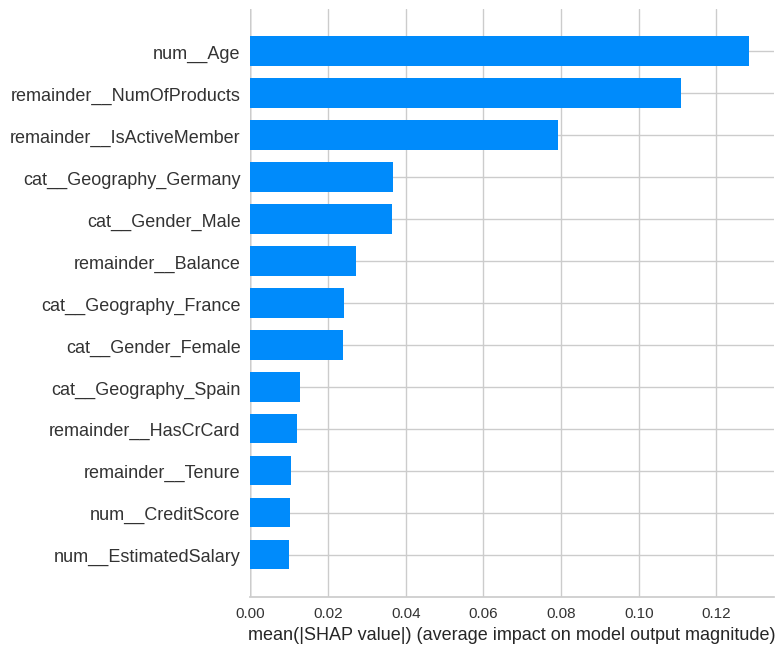

In [ ]:
## Summary Plot for Feature Importance
# plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values_class_1, X_test_transformed, feature_names=X_df.columns, plot_type="bar")
# plt.title("Feature Importance - SHAP Values (Random Forest)")
# plt.xlabel("Mean |SHAP Value|")
# plt.ylabel("Features")
# plt.show()

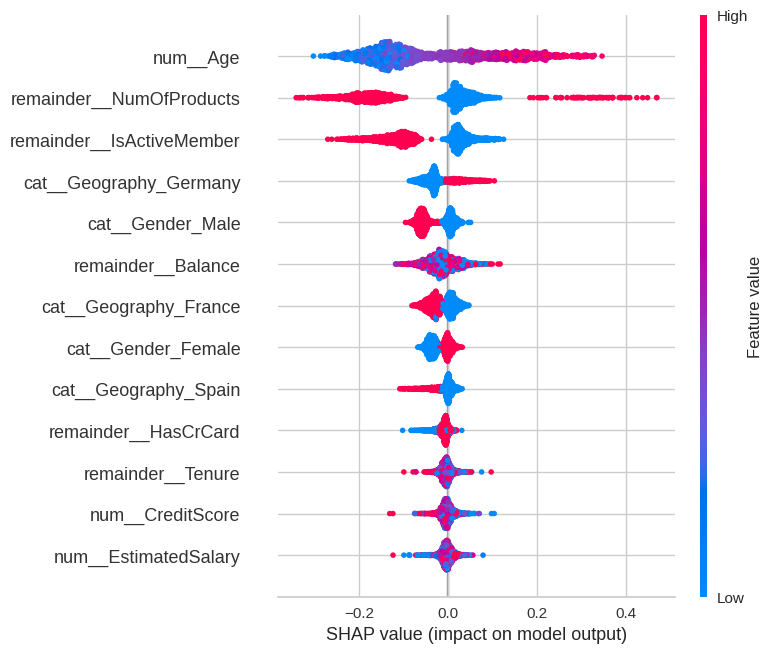

In [ ]:
# Summary chart to see the positive/negative impact of features
shap.summary_plot(shap_values_class_1, X_test_transformed, feature_names=X_df.columns)

In [ ]:
results['Actual_Exited'] = y_test
print(results[['Churn_Probability', 'Predicted_Exited', 'Actual_Exited']].head(10))

      Churn_Probability  Predicted_Exited Actual_Exited
6252               0.00                 0             0
4684               0.02                 0             0
1731               0.21                 0             0
4742               0.10                 0             0
4521               0.07                 0             0
6340               0.01                 0             0
576                0.10                 0             0
5202               0.19                 0             1
6363               0.25                 0             0
439                0.41                 1             0


# **Clustering 1: K-means**

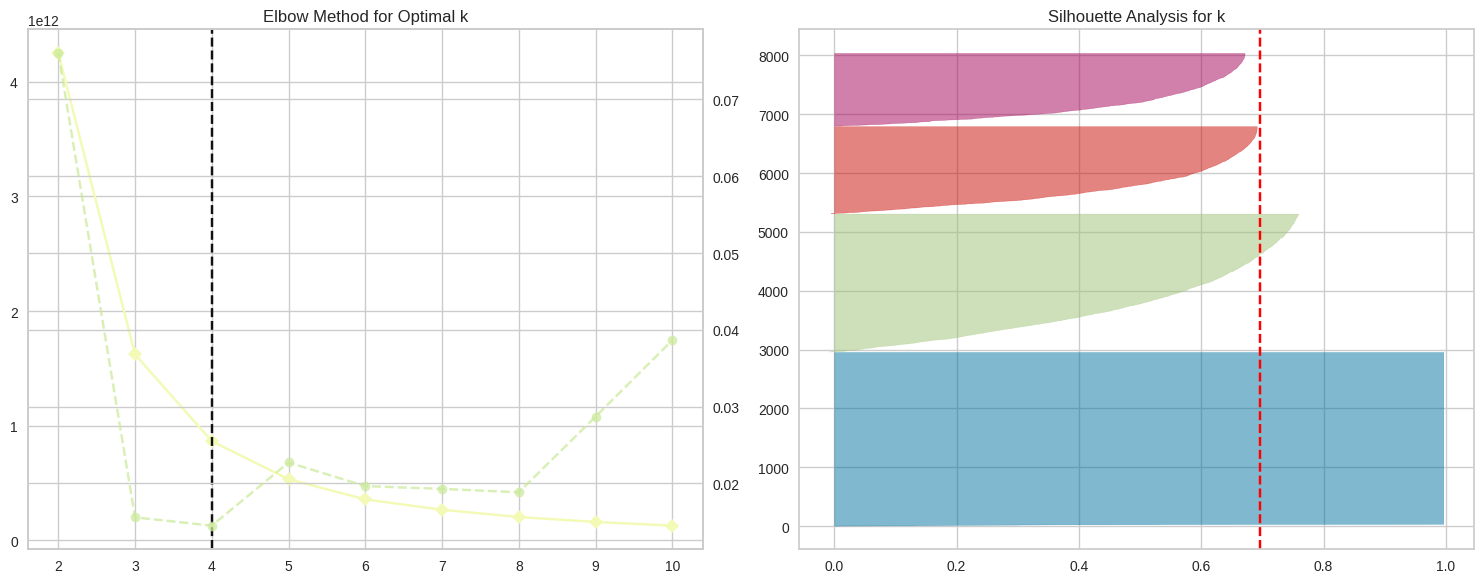

In [ ]:
# KMeans model configuration (assuming you have KMeans and yellowbrick libraries)
model = KMeans(init='k-means++', random_state=42, n_init='auto', max_iter=300)

# Create a figure with two subplots for elbow and silhouette plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Elbow plot for finding optimal number of clusters (k)
elbow_visualizer = KElbowVisualizer(model, k=(2, 11), ax=axes[0])  # Set k range (2 to 11) and subplot
elbow_visualizer.fit(X_train_transformed)  # Fit the elbow visualizer with your data (X_res)
axes[0].set_title("Elbow Method for Optimal k")  # Set title for elbow plot

# Check if elbow_value_ is None and set a default value if necessary
k = elbow_visualizer.elbow_value_ if elbow_visualizer.elbow_value_ is not None else 3  # Default to 3 clusters if elbow method fails

# Silhouette plot to evaluate cluster separation for chosen k
silhouette_model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)  # Use k instead of elbow_visualizer.elbow_value_
silhouette_visualizer = SilhouetteVisualizer(silhouette_model, ax=axes[1], colors='yellowbrick')  # Set subplot and color scheme
silhouette_visualizer.fit(X_train_transformed)  # Fit the silhouette visualizer with your data
axes[1].set_title("Silhouette Analysis for k")  # Set title for silhouette plot

# Adjust layout to prevent overlapping elements and display the plot
plt.tight_layout()
plt.show()

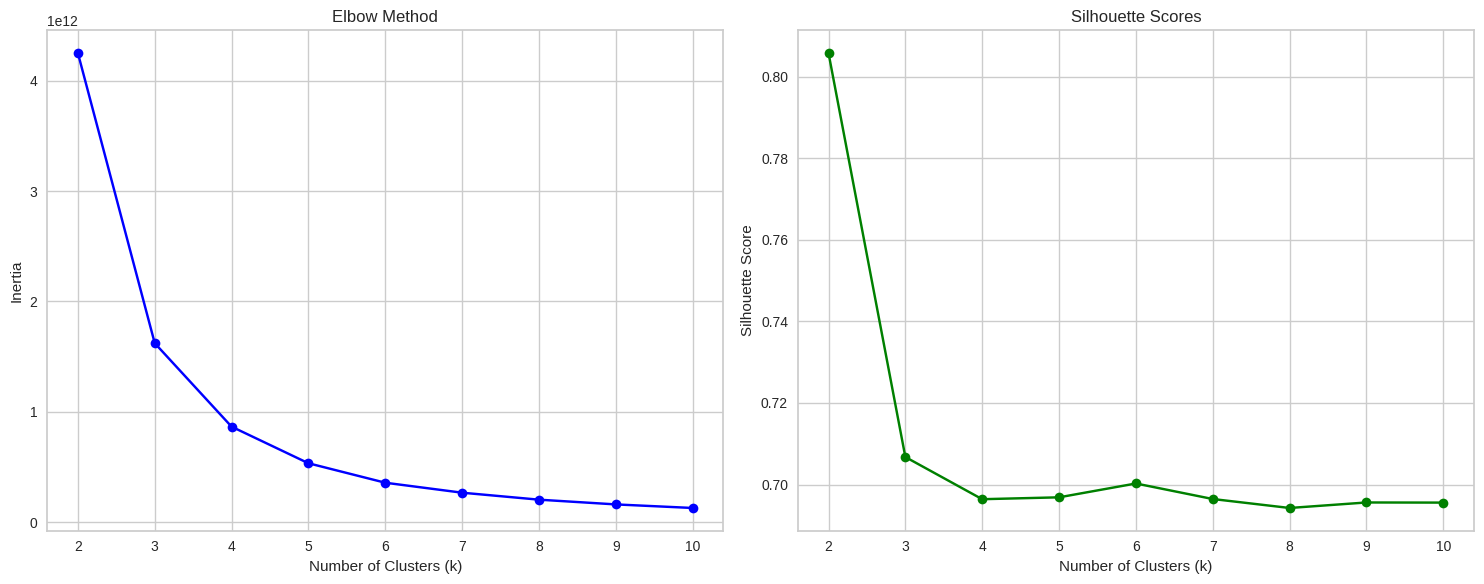

In [ ]:
# Create empty lists to store silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

# Define a range of k values (number of clusters) from 2 to 10
k_values = range(2, 11)

# Iterate over different k values to evaluate clustering performance
for k in k_values:
    # Create a KMeans model with the current k value
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto', max_iter=300)

    # Fit the model to the data and get the cluster labels
    labels = kmeans.fit_predict(X_train_transformed)

    # Calculate inertia (within-cluster sum of squares) and append to the list
    inertia_values.append(kmeans.inertia_)

    # Calculate silhouette score and append to the list
    silhouette_scores.append(silhouette_score(X_train_transformed, labels))

# Create a figure with two subplots for elbow and silhouette plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the elbow curve (inertia vs. number of clusters)
axes[0].plot(k_values, inertia_values, marker='o', color='blue')
axes[0].set_title("Elbow Method")
axes[0].set_xlabel("Number of Clusters (k)")
axes[0].set_ylabel("Inertia")

# Plot the silhouette scores (silhouette score vs. number of clusters)
axes[1].plot(k_values, silhouette_scores, marker='o', color='green')
axes[1].set_title("Silhouette Scores")
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Silhouette Score")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
def kmeans_with_metric(X, n_clusters, distance_metric='euclidean', random_state=42): # Set 'euclidean' as default
  """
  Performs KMeans clustering. Handles 'manhattan' distance separately.

  Args:
      X: The data to be clustered (scaled).
      n_clusters: The number of clusters.
      distance_metric: The distance metric to use ('euclidean', 'manhattan').
      random_state: Seed for random number generator (optional).

  Returns:
      labels: Cluster labels for each data point.
      silhouette_score: Silhouette Coefficient score.
      calinski_harabasz_score: Calinski-Harabasz Index score.
      davies_bouldin_score: Davies-Bouldin Index score.
  """
  # KMeans uses 'euclidean' by default, so no change needed for that case
  kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=random_state)
  kmeans.fit(X)
  labels = kmeans.labels_

  silhouette_score_val = silhouette_score(X, labels, metric=distance_metric) # Apply metric to silhouette_score
  calinski_harabasz_score_val = calinski_harabasz_score(X, labels)
  davies_bouldin_score_val = davies_bouldin_score(X, labels)

  return labels, silhouette_score_val, calinski_harabasz_score_val, davies_bouldin_score_val

In [ ]:
# Define distance metrics dictionary
distance_measures = {
    'euclidean': 'euclidean',
    'manhattan': 'manhattan',
    'cosine': 'cosine'
}

# Create a list to store results
results = []

# Loop through distance metrics
for measure_name, distance_metric in distance_measures.items():
    # Perform KMeans clustering with current metric
    labels, silhouette_kmeans, calinski_kmeans, davies_bouldin_kmeans = kmeans_with_metric(
        X_train_transformed,
        n_clusters=10,
        distance_metric=distance_metric
    )

    # Append results as a dictionary
    results.append({
        'Distance Metric': measure_name,
        'Silhouette Coefficient': silhouette_kmeans,
        'Calinski-Harabasz Index': calinski_kmeans,
        'Davies-Bouldin Index': davies_bouldin_kmeans
    })

# Convert results to a DataFrame
ResultsMetrics_df = pd.DataFrame(results)

# Display the DataFrame
ResultsMetrics_df

Distance Metric  Silhouette Coefficient  Calinski-Harabasz Index  \
0       euclidean                0.695572            213690.253141   
1       manhattan                0.695251            213690.253141   
2          cosine                0.102596            213690.253141   

   Davies-Bouldin Index  
0              0.493668  
1              0.493668  
2              0.493668

In [ ]:
# Define distance metrics dictionary
distance_measures = {
    'euclidean': 'euclidean',
    'manhattan': 'manhattan',
    'cosine': 'cosine'
}

# Create a list to store results
results = []

# Loop through distance metrics
for measure_name, distance_metric in distance_measures.items():
    # Perform KMeans clustering with current metric
    labels, silhouette_kmeans, calinski_kmeans, davies_bouldin_kmeans = kmeans_with_metric(
        X_train_transformed,
        n_clusters=10,
        distance_metric=distance_metric
    )

    # Append results as a dictionary
    results.append({
        'Distance Metric': measure_name,
        'Silhouette Coefficient': silhouette_kmeans,
        'Calinski-Harabasz Index': calinski_kmeans,
        'Davies-Bouldin Index': davies_bouldin_kmeans,
        'Labels': labels  # Store labels for each metric
    })

# Convert results to a DataFrame
ResultsMetrics_df = pd.DataFrame(results)

# Display the DataFrame
ResultsMetrics_df

# Find the best metric based on the silhouette coefficient
best_result = max(results, key=lambda x: x['Silhouette Coefficient'])

# Print the best metric and its silhouette score
print(f"Best Distance Metric: {best_result['Distance Metric']}")
print(f"Silhouette Coefficient: {best_result['Silhouette Coefficient']:.4f}")

# Add the labels for the best metric to the original DataFrame
X_train['Best_KMeans_Labels'] = best_result['Labels']

# Convert results to a DataFrame
ResultsMetrics_df = pd.DataFrame(results)

# Display the DataFrame
ResultsMetrics_df


Best Distance Metric: euclidean
Silhouette Coefficient: 0.6956


Distance Metric  Silhouette Coefficient  Calinski-Harabasz Index  \
0       euclidean                0.695572            213690.253141   
1       manhattan                0.695251            213690.253141   
2          cosine                0.102596            213690.253141   

   Davies-Bouldin Index                                             Labels  
0              0.493668  [1, 0, 9, 5, 5, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...  
1              0.493668  [1, 0, 9, 5, 5, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...  
2              0.493668  [1, 0, 9, 5, 5, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...

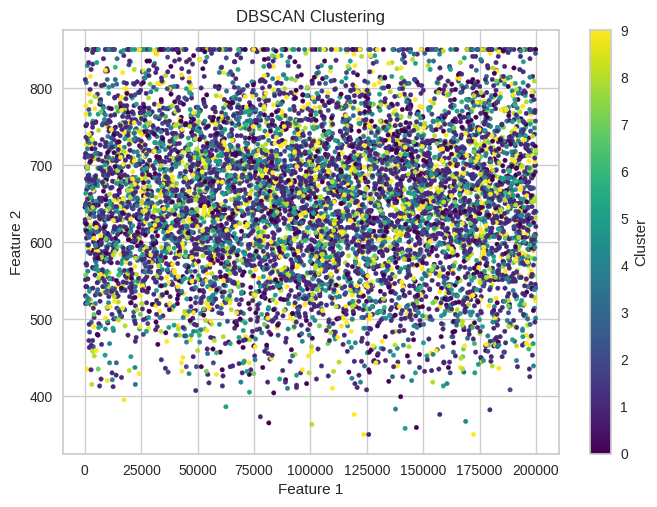

In [ ]:
plt.scatter(X_train['EstimatedSalary'], X_train['CreditScore'], c=X_train['Best_KMeans_Labels'], cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

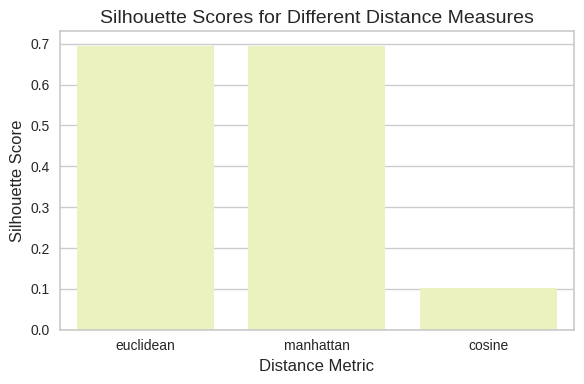

In [ ]:
# Create a bar plot to visualize silhouette scores for different distance metrics
plt.figure(figsize=(6, 4))  # Create a new figure with specified size

# Create a bar plot using Seaborn
sns.barplot(data=ResultsMetrics_df, x="Distance Metric", y="Silhouette Coefficient")

# Add a title to the plot
plt.title("Silhouette Scores for Different Distance Measures", fontsize=14)

# Add labels to the x and y axes
plt.xlabel("Distance Metric", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

# **Anomaly Detection**

In [ ]:
# Implementing the KMeans algorithm using the "euclidean" metric
labels_cosine, _, _, _ = kmeans_with_metric(
    X_train_transformed,
    n_clusters=10,
    distance_metric='cosine'
)

# Adding a label column to the original dataframe
X_train['Cluster_cosine'] = labels_cosine

# Displaying the first 3 rows of the dataframe with the new column
X_train.head(3)


CreditScore Geography Gender  Age  Tenure    Balance  NumOfProducts  \
9254          686    France   Male   32       6       0.00              2   
1561          632   Germany   Male   42       4  119624.60              2   
1670          559     Spain   Male   24       3  114739.92              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Cluster_cosine  
9254          1               1        179093.26               1  
1561          1               1        195978.86               0  
1670          1               0         85891.02               9

In [ ]:
# Melt the DataFrame to reshape for visualization
# results_melted = results_df.melt(id_vars="Distance Metric",
#                                  var_name="Metric",
#                                  value_name="Value")

results_melted

Distance Metric                   Metric        Value
0       euclidean   Silhouette Coefficient     0.190314
1       manhattan   Silhouette Coefficient     0.208780
2          cosine   Silhouette Coefficient     0.326908
3       euclidean  Calinski-Harabasz Index  1678.807967
4       manhattan  Calinski-Harabasz Index  1678.807967
5          cosine  Calinski-Harabasz Index  1678.807967
6       euclidean     Davies-Bouldin Index     1.931154
7       manhattan     Davies-Bouldin Index     1.931154
8          cosine     Davies-Bouldin Index     1.931154

# **Clustering2: DBSCAN**

In [ ]:
def dbscan_with_metric(X, eps=0.5, min_samples=5, distance_metric='euclidean', random_state=42):
    """
    Performs DBSCAN clustering using a custom distance metric.

    Args:
        X: The data to be clustered (scaled).
        eps: The maximum distance between two samples for them to be considered as in the same neighborhood.
        min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
        distance_metric: The distance metric to use ('euclidean', 'manhattan', 'cosine', etc.).
        random_state: Seed for random number generator (optional).

    Returns:
        labels: Cluster labels for each data point.
        silhouette_score: Silhouette Coefficient score.
    """
    # Apply DBSCAN with custom metric
    db = DBSCAN(eps=eps, min_samples=min_samples, metric=distance_metric)
    labels = db.fit_predict(X)

    # Calculate Silhouette Score
    silhouette = silhouette_score(X, labels, metric=distance_metric)

    # Return the cluster labels and silhouette score
    return labels, silhouette


In [ ]:
def dbscan_with_metric(X, eps=0.3, min_samples=3, distance_metric='euclidean', random_state=42):
    """
    Performs DBSCAN clustering using a custom distance metric.

    Args:
        X: The data to be clustered (scaled).
        eps: The maximum distance between two samples for them to be considered as in the same neighborhood.
        min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
        distance_metric: The distance metric to use ('euclidean', 'manhattan', 'cosine', etc.).
        random_state: Seed for random number generator (optional).

    Returns:
        labels: Cluster labels for each data point.
        silhouette_score: Silhouette Coefficient score.
    """
    # Apply DBSCAN with custom metric
    db = DBSCAN(eps=eps, min_samples=min_samples, metric=distance_metric)
    labels = db.fit_predict(X)

    # Calculate Silhouette Score only if more than 1 cluster is found
    # Check for the number of unique labels, excluding noise (-1)
    n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:  # Check for at least 2 clusters for silhouette calculation
        silhouette = silhouette_score(X, labels, metric=distance_metric)
    else:
        silhouette = np.nan  # Assign NaN if only one cluster
        print(f"Warning: Only one cluster found for {distance_metric}. Silhouette score cannot be calculated.")

    # Return the cluster labels and silhouette score
    return labels, silhouette

In [ ]:
# Create a list to store the results of different metric experiments
results = []

# Test different distance metrics
distance_metrics = ['euclidean', 'manhattan']
for metric in distance_metrics:
    # Apply DBSCAN with the specified metric and parameters
    labels, silhouette = dbscan_with_metric(X_train_transformed, eps=1.75, min_samples=3, distance_metric=metric)
    # Append the results to the list
    results.append({'metric': metric, 'silhouette': silhouette, 'labels': labels})
    # Print the results for the current metric
    print(f"Results for {metric} distance:")
    print(f"  Silhouette Score: {silhouette:.4f}")
    print(f"  Labels: {np.unique(labels)}\n")

# Find the best metric based on the silhouette score
best_result = max(results, key=lambda x: x['silhouette'])

# Print the results for the best metric
print(f"Best metric: {best_result['metric']}")
print(f"Silhouette Score: {best_result['silhouette']:.4f}")

# Add the DBSCAN labels to the original DataFrame
X_train['DBSCAN_Labels'] = best_result['labels']

Results for euclidean distance:
  Silhouette Score: 0.4400
  Labels: [-1  0  1  2]

Results for manhattan distance:
  Silhouette Score: 0.1944
  Labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59]

Best metric: euclidean
Silhouette Score: 0.4400


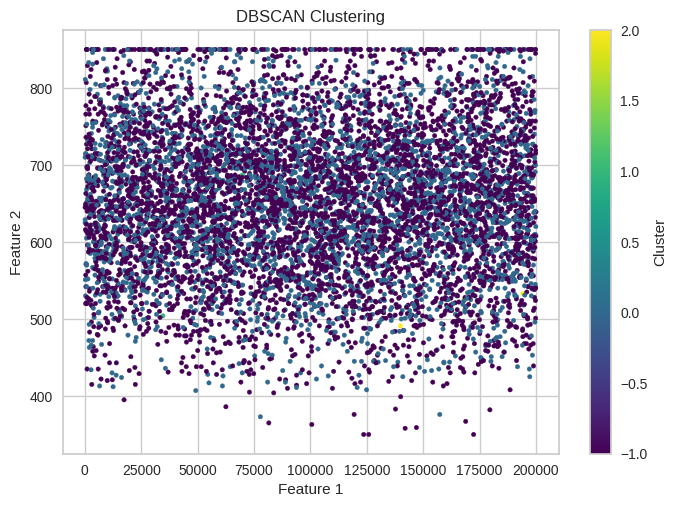

In [ ]:
plt.scatter(X_train['EstimatedSalary'], X_train['CreditScore'], c=X_train['DBSCAN_Labels'], cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# **Model1: lightgbm**

In [ ]:
# Create LightGBM datasets
# train_data = lgb.Dataset(X_res, label=y_res) # Create LightGBM dataset for training data
# test_data = lgb.Dataset(X_test_transformed, label=y_test) # Create LightGBM dataset for test data
# Create LightGBM datasets
train_data = lgb.Dataset(X_res, label=y_res.astype(int)) # Convert y_res to int
test_data = lgb.Dataset(X_test_transformed, label=y_test.astype(int)) # Convert y_test to int

# ... (rest of the code remains the same)

# LightGBM parameters
params = {
    'objective': 'binary',  # Binary classification task
    'metric': 'binary_logloss',  # Metric for binary classification
    'boosting_type': 'gbdt', # Gradient Boosting Decision Tree
    'learning_rate': 0.1, # Learning rate for boosting
    'num_leaves': 31, # Number of leaves in one tree
    'max_depth': -1, # No limit for tree depth
    'verbose': -1 # No output during training
}

# Dictionary to store evaluation results
evals_result = {}

# Custom callback function to record evaluation results
def record_eval(env):
    for data_name, eval_name, result, _ in env.evaluation_result_list: # unpack the tuple
        if data_name not in evals_result:
            evals_result[data_name] = {} # Create a nested dictionary
        if eval_name not in evals_result[data_name]:
            evals_result[data_name][eval_name] = [] # Create list to store metric values
        evals_result[data_name][eval_name].append(result) # Append results

# Train the LightGBM model
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],  # Training and validation datasets
    valid_names=['train', 'test'],  # Names for the datasets
    num_boost_round=100,  # Total number of boosting iterations
    callbacks=[lgb.early_stopping(stopping_rounds=10), record_eval],  # Early stopping and evaluation recording
)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[81]	train's binary_logloss: 0.17511	test's binary_logloss: 0.330946


In [ ]:
print("Training Loss:", evals_result['train']['binary_logloss'])
print("Validation Loss:", evals_result['test']['binary_logloss'])


Training Loss: [0.6327908042924308, 0.5836723498828355, 0.5427244325900569, 0.5079721173120211, 0.47820857966741714, 0.4528482476261065, 0.43016364572087384, 0.4104801518639231, 0.39335969070515, 0.3782843911515795, 0.3651240853857631, 0.35283205507506565, 0.3423303967072532, 0.33271354421512594, 0.32408185061248224, 0.3153311858936837, 0.3077681003524489, 0.3005204883259009, 0.29451272988227045, 0.28923049429251196, 0.2837348595013615, 0.27839459091439983, 0.2733355099037783, 0.2682122338480396, 0.2640678651536337, 0.2598693811830205, 0.2558581001472863, 0.25227668029904093, 0.24903871881703923, 0.24569217430332582, 0.2430235474274385, 0.2404319263752442, 0.2379997885234594, 0.2352371110997297, 0.23330842427651938, 0.23096057964680072, 0.22890271450978916, 0.22688893018179795, 0.22517124582434234, 0.2232350815887674, 0.22133466232948482, 0.21950141289432637, 0.21799512292194184, 0.21644855266457796, 0.21476454505707304, 0.21328981173201464, 0.21163915473070605, 0.2100217307727506, 0.2

In [ ]:
# Predict labels
y_pred = model.predict(X_test_transformed)  # Predict probabilities using the trained model
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1) using a threshold of 0.5

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary) # Calculate the accuracy score by comparing predicted labels with true labels
print(f"Accuracy: {accuracy:.4f}") # Print the accuracy score, formatted to four decimal places

Accuracy: 0.8660


In [ ]:
# Predict probabilities (probability of each class)
y_pred_proba = model.predict(X_test_transformed)  # Predict probabilities for the test data using the trained model

# Calculate binary log loss
log_loss_value = log_loss(y_test, y_pred_proba)  # Calculate the binary log loss between the true labels and predicted probabilities
print(f"Binary Log Loss: {log_loss_value:.4f}")  # Print the binary log loss value, formatted to four decimal places

Binary Log Loss: 0.3309


In [ ]:
# Predict probabilities (probability of each class)
y_pred_proba = model.predict(X_test_transformed)  # Predict probabilities for the test data using the trained model.

# Calculate AUC
auc_value = roc_auc_score(y_test, y_pred_proba)  # Calculate the Area Under the ROC Curve (AUC) between true labels and predicted probabilities.
print(f"AUC: {auc_value:.4f}")  # Print the AUC value, formatted to four decimal places.

AUC: 0.8689


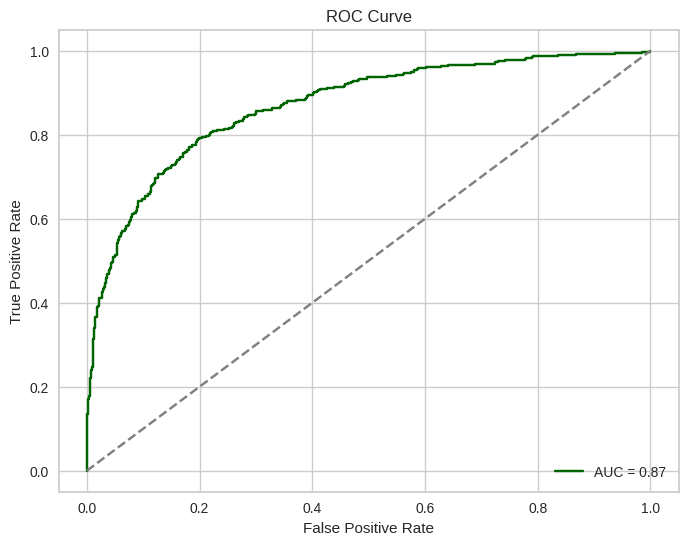

In [ ]:
# Calculate FPR and TPR for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Compute False Positive Rate and True Positive Rate

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_value:.2f}', color='darkgreen') # Plot the ROC curve and change the color to dark green
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Plot random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# مPrecision، Recall و F1-Score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.7049
Recall: 0.5471
F1-Score: 0.6160


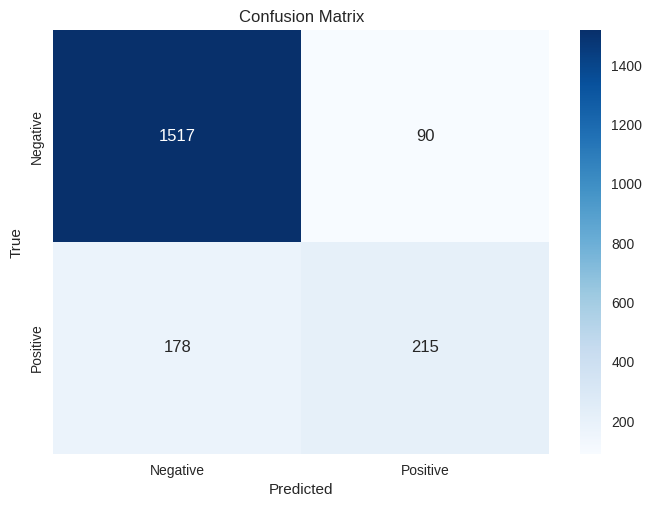

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)  # Compute confusion matrix to evaluate classification performance

# Display confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])  # Create a heatmap of the confusion matrix using seaborn
plt.title("Confusion Matrix")  # Set the title of the plot
plt.xlabel("Predicted")  # Set the label for the x-axis
plt.ylabel("True")  # Set the label for the y-axis
plt.show()  # Display the plot



In [ ]:
# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred_binary)  # Calculate accuracy score
precision = precision_score(y_test, y_pred_binary)  # Calculate precision score
recall = recall_score(y_test, y_pred_binary)  # Calculate recall score
f1 = f1_score(y_test, y_pred_binary)  # Calculate F1-score

# Create DataFrame to display metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],  # List of metric names
    'Value': [accuracy, precision, recall, f1]  # List of metric values
}

metrics_df = pd.DataFrame(metrics)  # Create a Pandas DataFrame from the metrics dictionary

# Display table
print(metrics_df)  # Print the DataFrame containing the metrics



      Metric     Value
0   Accuracy  0.866000
1  Precision  0.704918
2     Recall  0.547074
3   F1-Score  0.616046


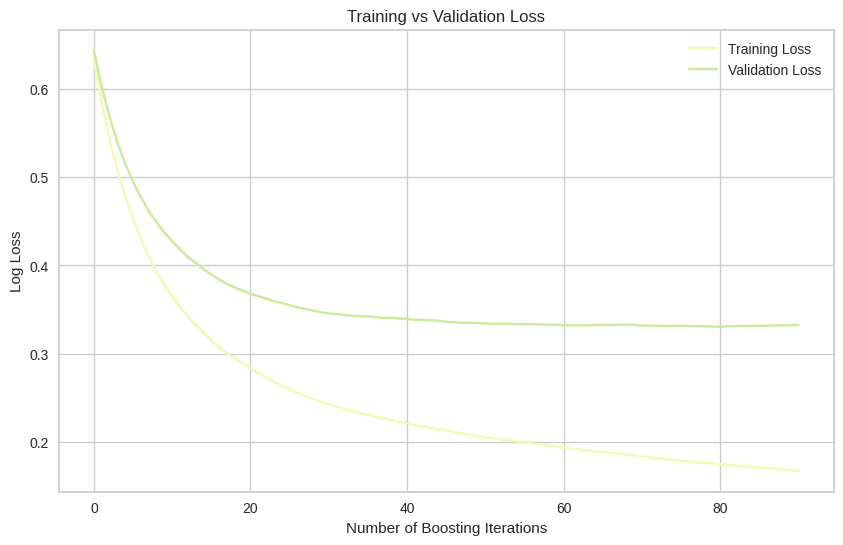

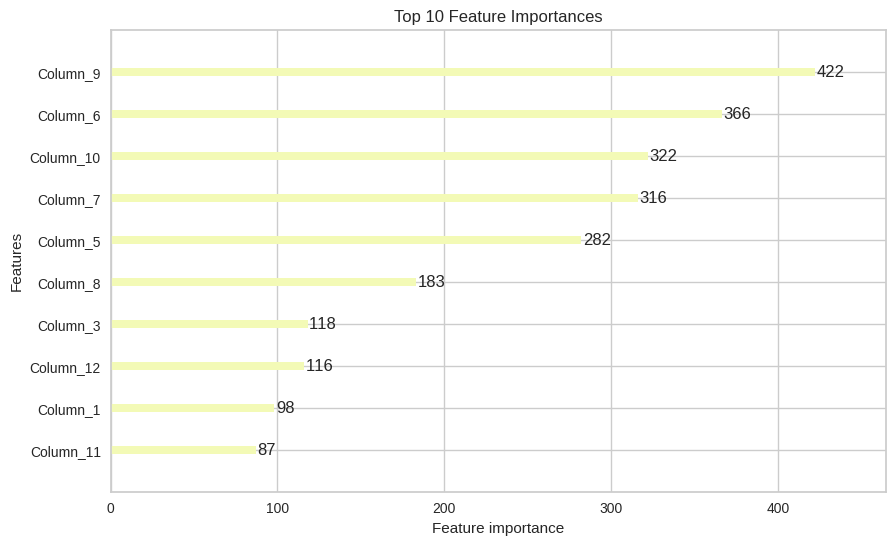

In [ ]:
# 1. Display loss plot
plt.figure(figsize=(10, 6))  # Create a figure for the plot
plt.plot(evals_result['train']['binary_logloss'], label='Training Loss')  # Plot training loss
plt.plot(evals_result['test']['binary_logloss'], label='Validation Loss')  # Plot validation loss
plt.title('Training vs Validation Loss')  # Set plot title
plt.xlabel('Number of Boosting Iterations')  # Set x-axis label
plt.ylabel('Log Loss')  # Set y-axis label
plt.legend()  # Add legend
plt.show()  # Display the plot

# 2. Display metrics table
metrics_df = pd.DataFrame(metrics)  # Create a DataFrame from the metrics dictionary
metrics_df  # Display the DataFrame

# 3. Display feature importance plot
lgb.plot_importance(model, max_num_features=10, importance_type='split', figsize=(10, 6))  # Plot feature importance
plt.title('Top 10 Feature Importances')  # Set plot title
plt.show()  # Display the plot


# **PCA**

In [ ]:
# # Access PCA features
# pca = pipeline.named_steps['pca']  # Access the PCA step from the pipeline

# # Extract feature loadings from PCA
# loadings = pca.components_  # Get the components (loadings) from the PCA object

# # If you want to display the importance of the original features (before PCA):
# feature_names = X.columns  # Get the original feature names

# # Calculate the influence of original features on PCA components
# # The original calculation resulted in an importance array with a different shape than feature_names.
# # This modification ensures that the importance is calculated for each original feature.
# importance = np.abs(loadings).sum(axis=0)[:len(feature_names)]  # Calculate importance for each PCA component and limit to the number of original features

# # Display feature importance plot based on PCA loadings
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(feature_names)), importance)  # Create a bar plot of feature importance
# plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Set x-axis ticks and labels
# plt.title('Feature Importance based on PCA Loadings')  # Set plot title
# plt.show()  # Display the plot

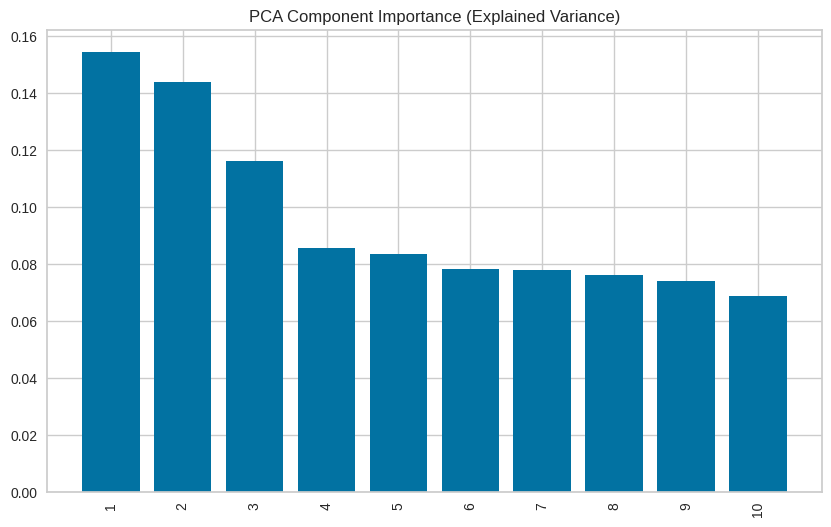

In [ ]:
# Explained variance by each PCA component
explained_variance = pca.explained_variance_ratio_  # Get the explained variance ratios from the PCA object

# Plot PCA component importance
plt.figure(figsize=(10, 6))  # Create a figure for the plot
plt.bar(range(len(explained_variance)), explained_variance)  # Create a bar plot of explained variance ratios
plt.xticks(range(len(explained_variance)), range(1, len(explained_variance) + 1), rotation=90)  # Set x-axis ticks and labels
plt.title('PCA Component Importance (Explained Variance)')  # Set plot title
plt.show()  # Display the plot



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

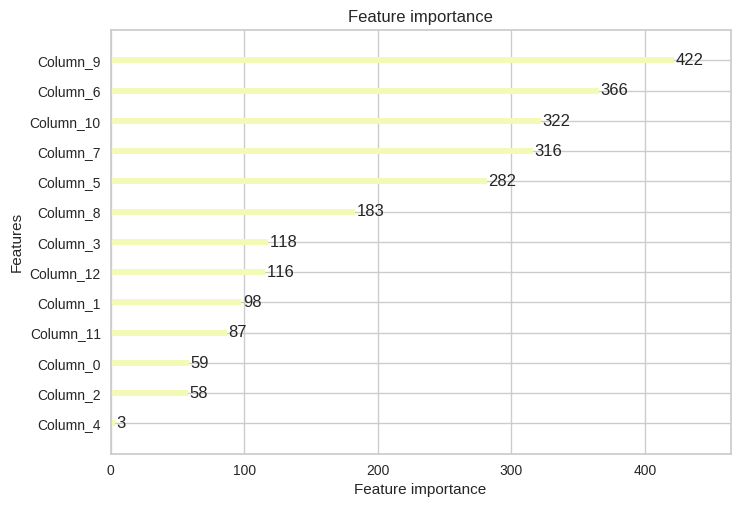

In [ ]:
lgb.plot_importance(model)

<Axes: >

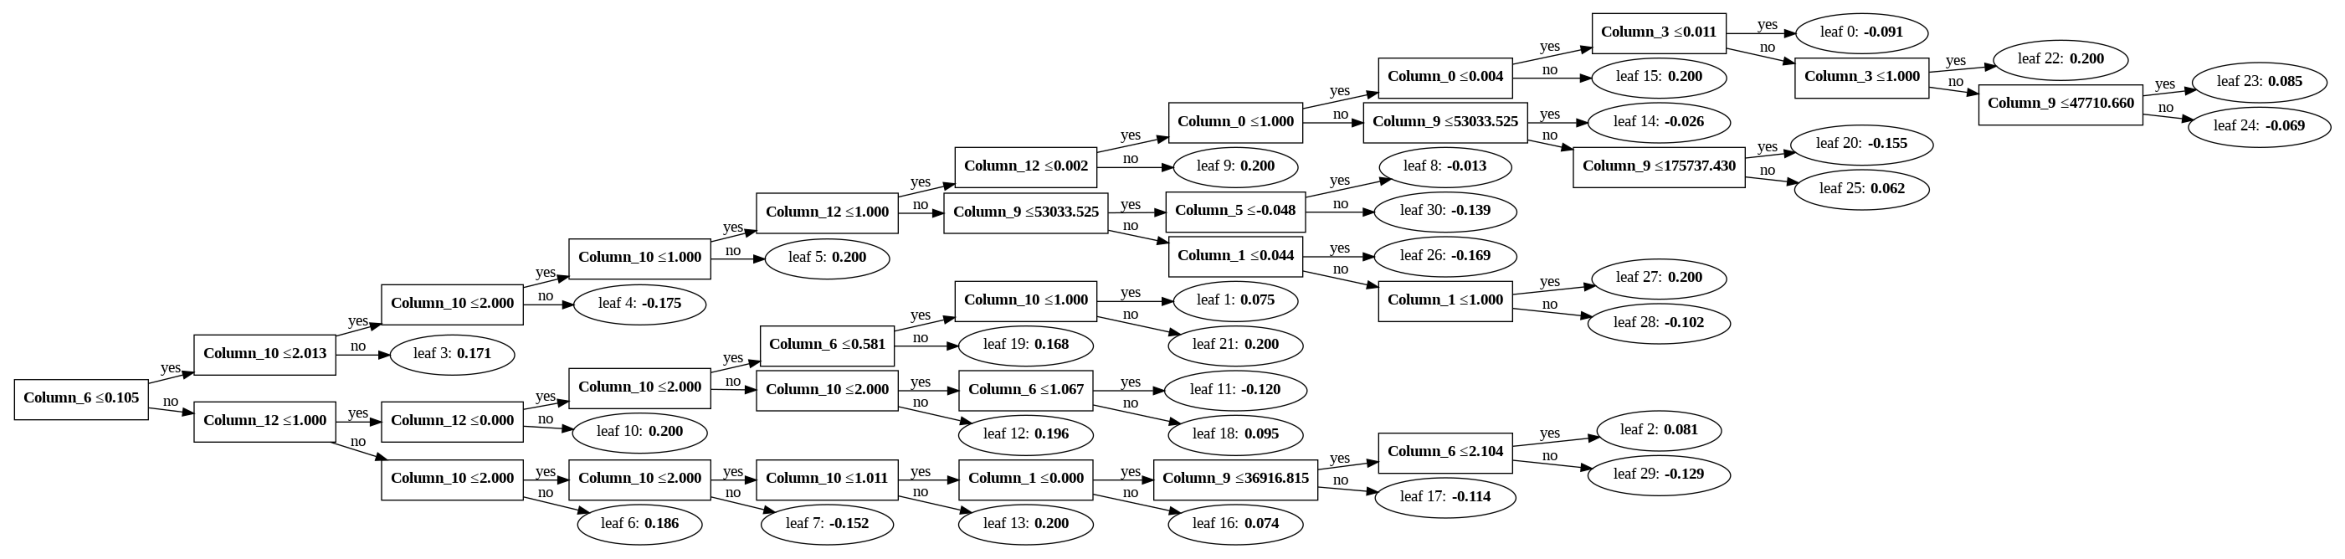

In [ ]:
lgb.plot_tree(model,figsize=(30,40))